# Vega Lite Examples in Haskell

The aim of this notebook is to use 
[`hvega`](http://hackage.haskell.org/package/hvega) - which is a Haskell
port of the 
[Elm Vega](http://package.elm-lang.org/packages/gicentre/elm-vega/2.2.1) 
module - to describe
the [Vega-Lite Gallery](https://vega.github.io/vega-lite/examples/)
in an IHaskell notebook.

## Jupyter Lab versus Notebook

Jupyter Lab - which can be run using
[Tweag's jupyterWith environment](https://github.com/tweag/jupyterWith) -
has native support for Vega and Vega-Lite visualizations, and so is
the *preferred* medium for `hvega`. This notebook was run using 
Jupter Lab, with the `shell.nix` file and the command

    nix-shell --command "jupyter lab"

When run using Jupyter notebooks, the visualizations are displayed
using the VegaEmbed JavaScript library, and do not provide a PNG
version for display outside of the browser (e.g. PDF or the various
ipynb viewers).

However, the *current* version (0.2) of `ihaskell-vega`, which provides
the typeclass used to tell IHaskell to automatically display Vega-Lite
visualizations, still defaults to the IPython notebook version, which
is why `vlShow` is used in the examples below to display the visualizations.
The plan is to switch (so that notebook users have to use `vlShow` or
an equivalent, and Lab users will not have to do anything) in a future
release.

## Versions

The initial conversion of the examples to `hvega` was done in April 2018, so the 
VegaLite gallery may have been updated since. I also make no claim that this is 
the best way to encode these visualizations!

The notebook was last run with version [0.2.0.0 of the `hvega` module](https://hackage.haskell.org/package/hvega) (which hasn't been released yet).

## Let's load up Vega-Lite

Since many of the strings used in `hvega` are actually `Data.Text.Text`,
we turn on `OverloadedStrings`.

In [1]:
{-# LANGUAGE OverloadedStrings #-}

-- VegaLite uses these names
import Prelude hiding (filter, lookup, repeat)

import Graphics.Vega.VegaLite

-- IHaskell automatically imports this if the `ihaskell-vega` module is installed
-- import IHaskell.Display.Hvega

The following imports are only to show the JSON representation of a Vega-Lite
visualization, and are not needed in "general" use of `hvega`.

In [2]:
import Data.Aeson.Encode.Pretty (encodePretty)
import Data.ByteString.Lazy.Char8 as BL8 hiding (filter, map, repeat)

-- Allow the VegaLite specification to be pretty-printed
ppSpec = BL8.putStrLn . encodePretty . fromVL

## Table of Contents

- [Basic](#Basic)
 - [Simple Bar Chart](#Simple-Bar-Chart)
 - [Aggregate Bar Chart](#Aggregate-Bar-Chart)
 - [Histogram](#Histogram)
 - [Gantt Chart](#Gantt-Chart)
 - [Grouped Bar Chart](#Grouped-Bar-Chart)
 - [Scatterplot](#Scatterplot)
 - [Scatterplot with filled circles](#Scatterplot-with-filled-circles)
 - [Binned Scatterplot](#Binned-Scatterplot)
 - [Colored Scatterplot](#Colored-Scatterplot)
 - [Scatterplot with Null Values in Grey](#Scatterplot-with-Null-Values-in-Grey)
 - [Bubble Plot](#Bubble-Plot)
 - [Gapminder Bubble Plot](#Gapminder-Bubble-Plot)
 - [Strip Plot](#Strip-Plot)
 - [Line Chart](#Line-Chart)
 - [Multi Series Line Chart](#Multi-Series-Line-Chart)
 - [Slope Graph](#Slope-Graph)
 - [Step Chart](#Step-Chart)
 - [Area Chart](#Area-Chart)
 - [Table Heatmap](#Table-Heatmap)
 - [A bar chart encoding color names in the data](A-bar-chart-encoding-color-names-in-the-data)
 - [Table Binned Heatmap](#Table-Binned-Heatmap)
 - [Table Bubble Plot (Github Punch Card)](#Table-Bubble-Plot-%28Github-Punch-Card%29)
 - [Natural Disasters](#Natural-Disasters)
- [Stack](#Stack)
 - [Stacked Bar Chart](#Stacked-Bar-Chart)
 - [Horizontal Stacked Bar Chart](#Horizontal-Stacked-Bar-Chart)
 - [Normalized Stacked Bar Chart](#Normalized-Stacked-Bar-Chart)
 - [Stacked Area Chart](#Stacked-Area-Chart)
 - [Normalized Stacked Area Chart](#Normalized-Stacked-Area-Chart)
 - [Streamgraph](#Streamgraph)
 - [Layered Bar Graph](#Layered-Bar-Graph)
 - [Diverging Stacked Bar Chart](#Diverging-Stacked-Bar-Chart)
- [Trellis](#Trellis)
 - [Anscombe's Quartet](#Anscombe's-Quartet)
 - [Trellis Bar Chart](#Trellis-Bar-Chart)
 - [Trellis Stacked Bar Chart](#Trellis-Stacked-Bar-Chart)
 - [Trellis Scatter Plot](#Trellis-Scatter-Plot)
 - [Trellis Histograms](#Trellis-Histograms)
 - [Becker's Barley Trellis Plot](#Becker's-Barley-Trellis-Plot)
 - [Trellis Area](#Trellis-Area)
- [Layering](#Layering)
 - [Simple Bar Chart With Labels](#Simple-Bar-Chart-With-Labels)
 - [Bar chart that highlights values beyond a threshold](#Bar-chart-that-highlights-values-beyond-a-threshold)
 - [Mean overlay over precipitation chart](#Mean-overlay-over-precipitation-chart)
 - [Layering text over heatmap](#Layering-text-over-heatmap)
 - [Box Plot with Min/Max Whiskers](#Box-Plot-with-Min%2FMax-Whiskers)
 - [Tukey Box Plot (1.5 IQR)](#Tukey-Box-Plot-%281.5-IQR%29)
 - [Candlestick Chart](#Candlestick-Chart)
 - [Error Bars showing Confidence Interval](#Error-Bars-showing-Confidence-Interval)
 - [Error Bars showing Standard Deviation](#Error-Bars-showing-Standard-Deviation)
 - [Histogram with a Global Mean Overlay](#Histogram-with-a-Global-Mean-Overlay)
 - [Scatterplot with Mean and Standard Deviation Overlay](#Scatterplot-with-Mean-and-Standard-Deviation-Overlay)
 - [Line chart with Confidence Interval Band](#Line-chart-with-Confidence-Interval-Band)
 - [Falkensee](#Falkensee)
 - [Ranged Dot Plot](#Ranged-Dot-Plot)
 - [Layered Plot with Dual-Axis](#Layered-Plot-with-Dual-Axis)
 - [Horizon Graph](#Horizon-Graph)
 - [Connected Scatterplot (Lines with Custom Paths)](#Connected-Scatterplot-%28Lines-with-Custom-Paths%29)
 - [Carbon Dioxide in the Atmosphere](#Carbon-Dioxide-in-the-Atmosphere)
- [Composition](#Composition)
 - [Repeat and layer to show different weather measures](#Repeat-and-layer-to-show-different-weather-measures)
 - [Vertically concatenated charts that show precipitation in Seattle](#Vertically-concatenated-charts-that-show-precipitation-in-Seattle)
 - [Horizontally repeated charts](#Horizontally-repeated-charts)
- [Geographical (Maps)](#Geographical-%28Maps%29)
 - [Choropleth of unemployment rate per county](#Choropleth-of-unemployment-rate-per-county)
 - [One dot per zipcode in the U.S.](#One-dot-per-zipcode-in-the-U.S.)
 - [One dot per airport in the US overlayed on geoshape](#One-dot-per-airport-in-the-US-overlayed-on-geoshape)
 - [Rules (line segments) connecting SEA to every airport reachable via direct flight](#Rules-%28line-segments%29-connecting-SEA-to-every-airport-reachable-via-direct-flight)
 - [Three choropleths representing disjoint data from the same table](#Three-choropleths-representing-disjoint-data-from-the-same-table)
 - [U.S. state capitals overlayed on a map of the U.S.](#U.S.-state-capitals-overlayed-on-a-map-of-the-U.S.)
 - [Line drawn between airports in the U.S. simulating a flight itinerary](#Line-drawn-between-airports-in-the-U.S.-simulating-a-flight-itinerary)
 - [Income in the U.S. by state, faceted over income brackets](#Income-in-the-U.S.-by-state,-faceted-over-income-brackets)
 - [London Tube Lines](#London-Tube-Lines)
- [Interactive](#Interactive)
 - [Rectangular Brush](#Rectangular-Brush)
 - [Paintbrush HIghlight](#Paintbrush-Highlight)
 - [Scatterplot Pan & Zoom](#Scatterplot-Pan-%26amp%3B-Zoom)
 - [Query Widgets](#Query-Widgets)
 - [Interactive Average](#Interactive-Average)
 - [Overview and Detail](#Overview-and-Detail)
 - [Crossfilter](#Crossfilter)
 - [Scatterplot Matrix](#Scatterplot-Matrix)
 - [Interactive Dashboard with Cross Highlight](#Interactive-Dashboard-with-Cross-Highlight)
 - [Multi Series Line Chart with Tooltips](#Multi-Series-Line-Chart-with-Tooltips)

# Basic

The basic plots from the [VegaLite examples](https://vega.github.io/vega-lite/examples/).

 - [Simple Bar Chart](#Simple-Bar-Chart)
 - [Aggregate Bar Chart](#Aggregate-Bar-Chart)
 - [Histogram](#Histogram)
 - [Gantt Chart](#Gantt-Chart)
 - [Grouped Bar Chart](#Grouped-Bar-Chart)
 - [Scatterplot](#Scatterplot)
 - [Scatterplot with filled circles](#Scatterplot-with-filled-circles)
 - [Binned Scatterplot](#Binned-Scatterplot)
 - [Colored Scatterplot](#Colored-Scatterplot)
 - [Scatterplot with Null Values in Grey](#Scatterplot-with-Null-Values-in-Grey)
 - [Bubble Plot](#Bubble-Plot)
 - [Gapminder Bubble Plot](#Gapminder-Bubble-Plot)
 - [Strip Plot](#Strip-Plot)
 - [Line Chart](#Line-Chart)
 - [Multi Series Line Chart](#Multi-Series-Line-Chart)
 - [Slope Graph](#Slope-Graph)
 - [Step Chart](#Step-Chart)
 - [Area Chart](#Area-Chart)
 - [Table Heatmap](#Table-Heatmap)
 - [A bar chart encoding color names in the data](A-bar-chart-encoding-color-names-in-the-data)
 - [Table Binned Heatmap](#Table-Binned-Heatmap)
 - [Table Bubble Plot (Github Punch Card)](#Table-Bubble-Plot-%28Github-Punch-Card%29)
 - [Natural Disasters](#Natural-Disasters)


## Simple Bar Chart

From https://vega.github.io/vega-lite/examples/bar.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A simple bar chart with embedded data.",
  "data": {
    "values": [
      {"a": "A","b": 28}, {"a": "B","b": 55}, {"a": "C","b": 43},
      {"a": "D","b": 91}, {"a": "E","b": 81}, {"a": "F","b": 53},
      {"a": "G","b": 19}, {"a": "H","b": 87}, {"a": "I","b": 52}
    ]
  },
  "mark": "bar",
  "encoding": {
    "x": {"field": "a", "type": "ordinal"},
    "y": {"field": "b", "type": "quantitative"}
  }
}
```

In [3]:
barFromColumns :: VegaLite
barFromColumns = 
    let desc = description "A simple bar chart with embedded data."
        dvals = dataFromColumns []
               . dataColumn "a" (Strings ["A", "B", "C", "D", "E", "F", "G", "H", "I"])
               . dataColumn "b" (Numbers [28, 55, 43, 91, 81, 53, 19, 87, 52])
         
        enc = encoding
              . position X [PName "a", PmType Ordinal]
              . position Y [PName "b", PmType Quantitative]

    in toVegaLite [desc, dvals [], mark Bar [], enc []]

The specification can be displayed, since it is "just" JSON:

In [4]:
ppSpec barFromColumns

{
    "mark": "bar",
    "data": {
        "values": [
            {
                "a": "A",
                "b": 28
            },
            {
                "a": "B",
                "b": 55
            },
            {
                "a": "C",
                "b": 43
            },
            {
                "a": "D",
                "b": 91
            },
            {
                "a": "E",
                "b": 81
            },
            {
                "a": "F",
                "b": 53
            },
            {
                "a": "G",
                "b": 19
            },
            {
                "a": "H",
                "b": 87
            },
            {
                "a": "I",
                "b": 52
            }
        ]
    },
    "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
    "encoding": {
        "x": {
            "field": "a",
            "type": "ordinal"
        },
        "y": {
            "field": "b",
           

Now use Vega-Embed to view the visualization directly (unfortunately this doesn't seem to work well with
non-JavaScript enabled views of a notebook):

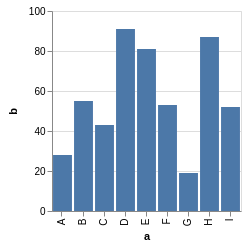

In [5]:
vlShow barFromColumns

The data can also be created using `dataFromRows`, as shown below:

In [6]:
barFromRows = 
    let desc = description "A simple bar chart with embedded data."
        dvals = dataFromRows []
                   . dataRow [("a", Str "A"), ("b", Number 28)]
                   . dataRow [("a", Str "B"), ("b", Number 55)]
                   . dataRow [("a", Str "C"), ("b", Number 43)]
                   . dataRow [("a", Str "D"), ("b", Number 91)]
                   . dataRow [("a", Str "E"), ("b", Number 81)]
                   . dataRow [("a", Str "F"), ("b", Number 53)]
                   . dataRow [("a", Str "G"), ("b", Number 19)]
                   . dataRow [("a", Str "H"), ("b", Number 87)]
                   . dataRow [("a", Str "I"), ("b", Number 52)]

        enc = encoding
                . position X [PName "a", PmType Ordinal]
                . position Y [PName "b", PmType Quantitative]

    in toVegaLite [desc, dvals [], mark Bar [], enc []]

Are the two sepcifications correct (there is currently no `Eq` instance defined for the `VegaLite`
type so the underlying JSON representation is extracted using `fromVL`)?

In [7]:
fromVL barFromColumns == fromVL barFromRows

True

Return to the [Table of Contents](#Table-of-Contents).

## Aggregate Bar Chart

From https://vega.github.io/vega-lite/examples/bar_aggregate.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A bar chart showing the US population distribution of age groups in 2000.",
  "data": { "url": "data/population.json"},
  "transform": [{"filter": "datum.year == 2000"}],
  "mark": "bar",
  "encoding": {
    "y": {
      "field": "age", "type": "ordinal",
      "scale": {"rangeStep": 17}
    },
    "x": {
      "aggregate": "sum", "field": "people", "type": "quantitative",
      "axis": {"title": "population"}
    }
  }
}
```

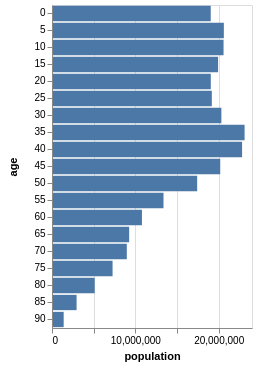

In [8]:
barAggregate =
    let desc = "A bar chart showing the US population distribution of age groups in 2000."
    
        -- Local file access appears problematic in Jupyter notebooks but seems to
        -- work fine in Jupyter Lab sessions. For the moment I use URLs but may
        -- switch to local files in these examples.
        --
        -- dvals = dataFromUrl "data/population.json" []
        --
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/population.json" []
        
        trans = transform (filter (FExpr "datum.year == 2000") [])
        enc = encoding
                 . position Y [ PName "age", PmType Ordinal
                              , PScale [SRangeStep (Just 17)]
                              ]
                 . position X [ PName "people", PmType Quantitative
                              , PAggregate Sum
                              , PAxis [AxTitle "population"]
                              ]
    in toVegaLite [description desc, dvals, trans, mark Bar [], enc []]
       
vlShow barAggregate

Return to the [Table of Contents](#Table-of-Contents).

## Histogram

From https://vega.github.io/vega-lite/examples/histogram.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/movies.json"},
  "mark": "bar",
  "encoding": {
    "x": {
      "bin": true,
      "field": "IMDB_Rating",
      "type": "quantitative"
    },
    "y": {
      "aggregate": "count",
      "type": "quantitative"
    }
  }
}
```

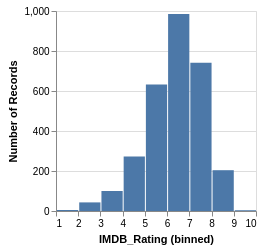

In [9]:
histogram = 
    let -- dvals = dataFromUrl "data/movies.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/movies.json" []
        enc = encoding
                 . position Y [ PAggregate Count, PmType Quantitative]
                 . position X [ PName "IMDB_Rating", PmType Quantitative
                              , PBin []
                              ]
    in toVegaLite [dvals, mark Bar [], enc []]

vlShow histogram

Return to the [Table of Contents](#Table-of-Contents).

## Gantt Chart

From https://vega.github.io/vega-lite/examples/bar_gantt.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A simple bar chart with ranged data (aka Gantt Chart).",
  "data": {
    "values": [
      {"task": "A","start": 1, "end": 3},
      {"task": "B","start": 3, "end": 8},
      {"task": "C","start": 8, "end": 10}
    ]
  },
  "mark": "bar",
  "encoding": {
    "y": {"field": "task", "type": "ordinal"},
    "x": {"field": "start", "type": "quantitative"},
    "x2": {"field": "end", "type": "quantitative"}
  }
}
```

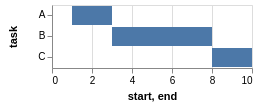

In [10]:
barGantt =
    let desc = "A simple bar chart with ranged data (aka Gantt Chart)."

        dvals = dataFromColumns []
                   . dataColumn "task" (Strings ["A", "B", "C"])
                   . dataColumn "start" (Numbers [1, 3, 8])
                   . dataColumn "end" (Numbers [3, 8, 10])
           
        enc = encoding
                 . position Y [PName "task", PmType Ordinal]
                 . position X [PName "start", PmType Quantitative]
                 . position X2 [PName "end", PmType Quantitative]
                 
    in toVegaLite [description desc, dvals [], mark Bar [], enc []]
       
vlShow barGantt

Return to the [Table of Contents](#Table-of-Contents).

## Grouped Bar Chart

From https://vega.github.io/vega-lite/examples/bar_grouped.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": { "url": "data/population.json"},
  "transform": [
    {"filter": "datum.year == 2000"},
    {"calculate": "datum.sex == 2 ? 'Female' : 'Male'", "as": "gender"}
  ],
  "mark": "bar",
  "encoding": {
    "column": {
      "field": "age", "type": "ordinal"
    },
    "y": {
      "aggregate": "sum", "field": "people", "type": "quantitative",
      "axis": {"title": "population", "grid": false}
    },
    "x": {
      "field": "gender", "type": "nominal",
      "scale": {"rangeStep": 12},
      "axis": {"title": ""}
    },
    "color": {
      "field": "gender", "type": "nominal",
      "scale": {"range": ["#EA98D2", "#659CCA"]}
    }
  },
  "config": {
    "view": {"stroke": "transparent"},
    "axis": {"domainWidth": 1}
  }
}
```

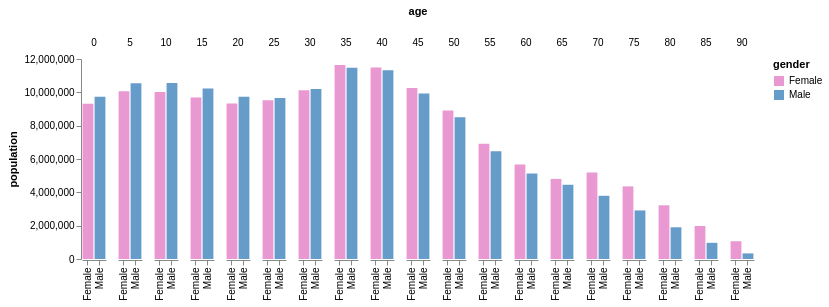

In [11]:
barGrouped =
    let -- dvals = dataFromUrl "data/population.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/population.json"
           
        trans = transform 
                   . filter (FExpr "datum.year == 2000")
                   . calculateAs "datum.sex == 2 ? 'Female' : 'Male'" "gender"

        enc = encoding
                 . column [FName "age", FmType Ordinal]
                 . position Y [ PName "people", PmType Quantitative, PAggregate Sum,
                                PAxis [AxTitle "population", AxGrid False]
                              ]
                 . position X [ PName "gender", PmType Nominal
                              , PScale [SRangeStep (Just 12)]
                              , PAxis [AxTitle ""]
                              ]
                 . color [ MName "gender", MmType Nominal, MScale [SRange (RStrings ["#EA98D2", "#659CCA"])] ]
                                  
        config = configure
                    . configuration (View [Stroke (Just "transparent")])
                    . configuration (Axis [DomainWidth 1])
           
    in toVegaLite [dvals [], trans [], mark Bar [], enc [], config []]
       
vlShow barGrouped

Return to the [Table of Contents](#Table-of-Contents).

## Scatterplot

From https://vega.github.io/vega-lite/examples/point_2d.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A scatterplot showing horsepower and miles per gallons for various cars.",
  "data": {"url": "data/cars.json"},
  "mark": "point",
  "encoding": {
    "x": {"field": "Horsepower","type": "quantitative"},
    "y": {"field": "Miles_per_Gallon","type": "quantitative"}
  }
}
```

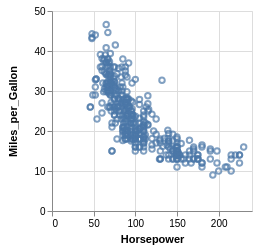

In [12]:
point2d =
    let -- dvals = dataFromUrl "data/cars.json"
       dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
       desc = "A scatterplot showing horsepower and miles per gallons for various cars."
           
       enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative]
                 . position Y [PName "Miles_per_Gallon", PmType Quantitative]

    in toVegaLite [description desc, dvals [], mark Point [], enc []]
       
vlShow point2d

Return to the [Table of Contents](#Table-of-Contents).

## Scatterplot with filled circles

From https://vega.github.io/vega-lite/examples/circle.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/cars.json"},
  "mark": "circle",
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"}
  }
}
```

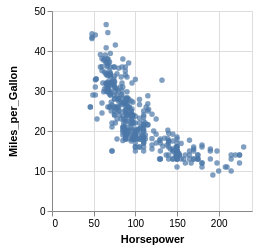

In [13]:
circle =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
        desc = "A scatterplot showing horsepower and miles per gallons for various cars."
           
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative]
                 . position Y [PName "Miles_per_Gallon", PmType Quantitative]

    in toVegaLite [dvals [], mark Circle [], enc []]

vlShow circle

Return to the [Table of Contents](#Table-of-Contents).

## Binned Scatterplot

From https://vega.github.io/vega-lite/examples/circle_binned.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/movies.json"},
  "mark": "circle",
  "encoding": {
    "x": {
      "bin": {"maxbins": 10},
      "field": "IMDB_Rating",
      "type": "quantitative"
    },
    "y": {
      "bin": {"maxbins": 10},
      "field": "Rotten_Tomatoes_Rating",
      "type": "quantitative"
    },
    "size": {
      "aggregate": "count",
      "type": "quantitative"
    }
  }
}
```

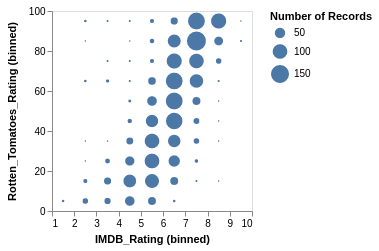

In [14]:
circleBinned =
    let -- dvals = dataFromUrl "data/movies.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/movies.json"
           
        enc = encoding
                 . position X [PName "IMDB_Rating", PmType Quantitative, PBin [MaxBins 10]]
                 . position Y [PName "Rotten_Tomatoes_Rating", PmType Quantitative, PBin [MaxBins 10]]
                 . size [MAggregate Count, MmType Quantitative]
                 
    in toVegaLite [dvals [], mark Circle [], enc []]
       
vlShow circleBinned

Return to the [Table of Contents](#Table-of-Contents).

## Colored Scatterplot

From https://vega.github.io/vega-lite/examples/point_color_with_shape.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A scatterplot showing horsepower and miles per gallons.",
  "data": {"url": "data/cars.json"},
  "mark": "point",
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
    "color": {"field": "Origin", "type": "nominal"},
    "shape": {"field": "Origin", "type": "nominal"}
  }
}
```

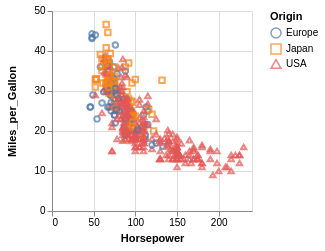

In [15]:
pointColorWithShape =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
        desc = "A scatterplot showing horsepower and miles per gallons."
           
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative]
                 . position Y [PName "Miles_per_Gallon", PmType Quantitative]
                 . color [MName "Origin", MmType Nominal]
                 . shape [MName "Origin", MmType Nominal]
                 
    in toVegaLite [description desc, dvals [], mark Point [], enc []]
       
vlShow pointColorWithShape

Return to the [Table of Contents](#Table-of-Contents).

## Scatterplot with Null Values in Grey

From https://vega.github.io/vega-lite/examples/point_invalid_color.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {
    "url": "data/movies.json"
  },
  "mark": "point",
  "encoding": {
    "x": {
      "field": "IMDB_Rating",
      "type": "quantitative"
    },
    "y": {
      "field": "Rotten_Tomatoes_Rating",
      "type": "quantitative"
    },
    "color": {
      "condition": {
        "test": "datum.IMDB_Rating === null || datum.Rotten_Tomatoes_Rating === null",
        "value": "#aaa"
      }
    }
  },
  "config": {
    "invalidValues": null
  }
}
```

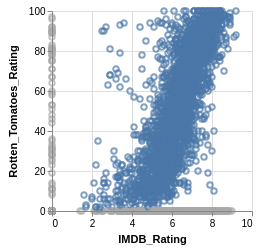

In [16]:
pointInvalidColor =
    let -- dvals = dataFromUrl "data/movies.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/movies.json"
           
        enc = encoding
                 . position X [PName "IMDB_Rating", PmType Quantitative]
                 . position Y [PName "Rotten_Tomatoes_Rating", PmType Quantitative]
                 . color [MDataCondition
                          (Expr "datum.IMDB_Rating === null || datum.Rotten_Tomatoes_Rating === null")
                          [MString "#aaa"]
                          []
                          ]
                 
        config = configure
                    . configuration (RemoveInvalid False)
           
    in toVegaLite [dvals [], mark Point [], enc [], config []]

vlShow pointInvalidColor

Return to the [Table of Contents](#Table-of-Contents).

## Bubble Plot

From https://vega.github.io/vega-lite/examples/point_bubble.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A bubbleplot showing horsepower on x, miles per gallons on y, and binned acceleration on size.",
  "data": {"url": "data/cars.json"},
  "mark": "point",
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
    "size": {"field": "Acceleration", "type": "quantitative"}
  }
}
```

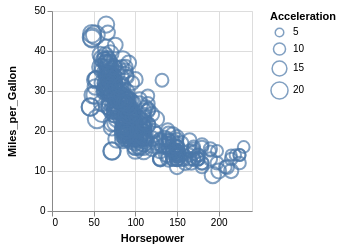

In [17]:
pointBubble =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
        desc = "A bubbleplot showing horsepower on x, miles per gallons on y, and binned acceleration on size."
           
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative]
                 . position Y [PName "Miles_per_Gallon", PmType Quantitative]
                 . size [MName "Acceleration", MmType Quantitative]

    in toVegaLite [description desc, dvals [], mark Point [], enc []]
       
vlShow pointBubble

Return to the [Table of Contents](#Table-of-Contents).

## Gapminder Bubble Plot

From https://vega.github.io/vega-lite/examples/circle_bubble_health_income.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A bubble plot showing the correlation between health and income for 187 countries in the world (modified from an example in Lisa Charlotte Rost's blog post 'One Chart, Twelve Charting Libraries' --http://lisacharlotterost.github.io/2016/05/17/one-chart-code/).",
  "width": 500,"height": 300,
  "data": {
    "url": "data/gapminder-health-income.csv"
  },
  "selection": {
    "view": {"type": "interval", "bind": "scales"}
  },
  "mark": "circle",
  "encoding": {
    "y": {
      "field": "health",
      "type": "quantitative",
      "scale": {"zero": false}
    },
    "x": {
      "field": "income",
      "type": "quantitative",
      "scale": {"type": "log"}
    },
    "size": {"field": "population","type": "quantitative"},
    "color": {"value": "#000"}
  }
}
```

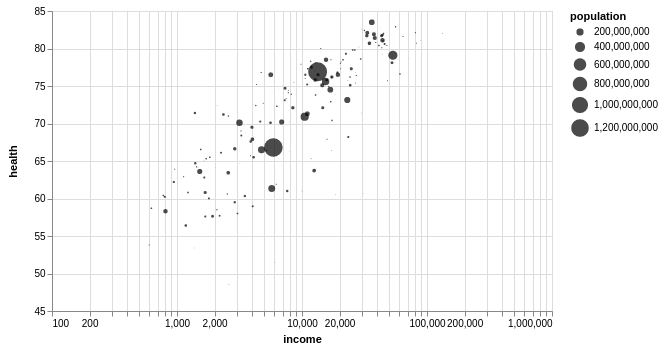

In [18]:
circleBubbleHealthIncome =
    let -- dvals = dataFromUrl "data/gapminder-health-income.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/gapminder-health-income.csv"
        desc = "A bubble plot showing the correlation between health and income for 187 countries in the world (modified from an example in Lisa Charlotte Rost's blog post 'One Chart, Twelve Charting Libraries' --http://lisacharlotterost.github.io/2016/05/17/one-chart-code/)."
           
        sel = selection
                 . select "view" Interval [BindScales]
                 
        enc = encoding
                 . position Y [PName "health", PmType Quantitative, PScale [SZero False]]
                 . position X [PName "income", PmType Quantitative, PScale [SType ScLog]]
                 . size [MName "population", MmType Quantitative]
                 . color [MString "#000"]

    in toVegaLite [ description desc, width 500, height 300
                  , dvals [], sel [], mark Circle [], enc [] ]
        
vlShow circleBubbleHealthIncome

Return to the [Table of Contents](#Table-of-Contents).

## Strip Plot

From https://vega.github.io/vega-lite/examples/tick_strip.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Shows the relationship between horsepower and the numbver of cylinders using tick marks.",
  "data": {"url": "data/cars.json"},
  "mark": "tick",
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Cylinders", "type": "ordinal"}
  }
}
```

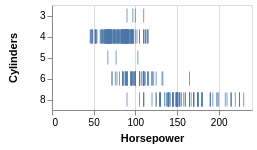

In [19]:
tickStrip =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
        desc = "Shows the relationship between horsepower and the numbver of cylinders using tick marks."
           
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative]
                 . position Y [PName "Cylinders", PmType Ordinal]

    in toVegaLite [description desc, dvals [], mark Tick [], enc []]
       
vlShow tickStrip

Return to the [Table of Contents](#Table-of-Contents).

## Line Chart

From https://vega.github.io/vega-lite/examples/line.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Google's stock price over time.",
  "data": {"url": "data/stocks.csv"},
  "transform": [{"filter": "datum.symbol==='GOOG'"}],
  "mark": "line",
  "encoding": {
    "x": {"field": "date", "type": "temporal", "axis": {"format": "%Y"}},
    "y": {"field": "price", "type": "quantitative"}
  }
}
```

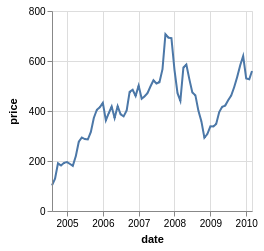

In [20]:
line =
    let -- dvals = dataFromUrl "data/stocks.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/stocks.csv"
        desc = "Google's stock price over time."
           
        trans = transform
                   . filter (FExpr "datum.symbol==='GOOG'")
                   
        enc = encoding
                 . position X [PName "date", PmType Temporal, PAxis [AxFormat "%Y"]]
                 . position Y [PName "price", PmType Quantitative]

    in toVegaLite [description desc, dvals [], trans [], mark Line [], enc []]
       
vlShow line

Return to the [Table of Contents](#Table-of-Contents).

## Multi Series Line Chart

From https://vega.github.io/vega-lite/examples/line_color.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Stock prices of 5 Tech Companies over Time.",
  "data": {"url": "data/stocks.csv"},
  "mark": "line",
  "encoding": {
    "x": {"field": "date", "type": "temporal", "axis": {"format": "%Y"}},
    "y": {"field": "price", "type": "quantitative"},
    "color": {"field": "symbol", "type": "nominal"}
  }
}
```

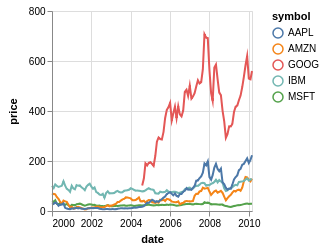

In [21]:
lineColor =
    let -- dvals = dataFromUrl "data/stocks.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/stocks.csv"
        desc = "Stock prices of 5 Tech Companies over Time."
           
        enc = encoding
                 . position X [PName "date", PmType Temporal, PAxis [AxFormat "%Y"]]
                 . position Y [PName "price", PmType Quantitative]
                 . color [MName "symbol", MmType Nominal]

    in toVegaLite [description desc, dvals [], mark Line [], enc []]
       
vlShow lineColor

Return to the [Table of Contents](#Table-of-Contents).

## Slope Graph

From https://vega.github.io/vega-lite/examples/line_slope.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/barley.json"},
  "description": "Slope graph showing the change in yield for different barley sites. It shows the error in the year labels for the Morris site.",
  "mark": "line",
  "encoding": {
    "x": {
      "field": "year",
      "type": "ordinal",
      "scale": {"rangeStep": 50, "padding": 0.5}
    },
    "y": {
      "aggregate": "median",
      "field": "yield",
      "type": "quantitative"
    },
    "color": {"field": "site", "type": "nominal"}
  }
}
```

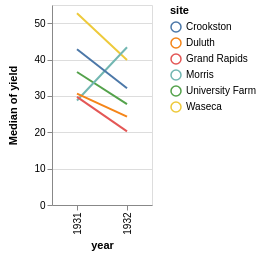

In [22]:
lineSlope =
    let -- dvals = dataFromUrl "data/barley.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/barley.json"
        desc = "Slope graph showing the change in yield for different barley sites. It shows the error in the year labels for the Morris site."
           
        enc = encoding
                 . position X [ PName "year", PmType Ordinal
                              , PScale [SRangeStep (Just 50), SPadding 0.5]
                              ]
                 . position Y [ PName "yield", PmType Quantitative
                              , PAggregate Median
                              ]
                 . color [MName "site", MmType Nominal]

    in toVegaLite [description desc, dvals [], mark Line [], enc []]
       
vlShow lineSlope

Return to the [Table of Contents](#Table-of-Contents).

## Step Chart

From https://vega.github.io/vega-lite/examples/line_step.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Google's stock price over time.",
  "data": {"url": "data/stocks.csv"},
  "transform": [{"filter": "datum.symbol==='GOOG'"}],
  "mark": {
    "type": "line",
    "interpolate": "step-after"
  },
  "encoding": {
    "x": {"field": "date", "type": "temporal"},
    "y": {"field": "price", "type": "quantitative"}
  }
}
```

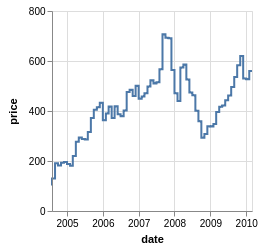

In [23]:
lineStep =
    let -- dvals = dataFromUrl "data/stocks.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/stocks.csv"
        desc = "Google's stock price over time."
           
        trans = transform
                   . filter (FExpr "datum.symbol==='GOOG'")
                   
        enc = encoding
                 . position X [PName "date", PmType Temporal]
                 . position Y [PName "price", PmType Quantitative]

    in toVegaLite [ description desc, dvals [], trans []
                  , mark Line [MInterpolate StepAfter]
                  , enc []]
       
vlShow lineStep

Return to the [Table of Contents](#Table-of-Contents).

## Area Chart

From https://vega.github.io/vega-lite/examples/area.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "width": 300,
  "height": 200,
  "data": {"url": "data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date", "type": "temporal",
      "axis": {"format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count", "type": "quantitative",
      "axis": {"title": "count"}
    }
  }
}
```

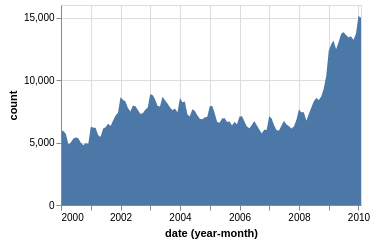

In [24]:
area =
    let -- dvals = dataFromUrl "data/unemployment-across-industries.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/unemployment-across-industries.json"
           
        enc = encoding
                 . position X [ PName "date", PmType Temporal
                              , PTimeUnit YearMonth, PAxis [AxFormat "%Y"]]
                 . position Y [ PName "count", PmType Quantitative
                              , PAggregate Sum, PAxis [AxTitle "count"]]

    in toVegaLite [width 300, height 200, dvals [], mark Area [], enc []]
       
vlShow area

Return to the [Table of Contents](#Table-of-Contents).

## Table Heatmap

From https://vega.github.io/vega-lite/examples/rect_heatmap.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/cars.json"},
  "mark": "rect",
  "encoding": {
    "y": {"field": "Origin", "type": "nominal"},
    "x": {"field": "Cylinders", "type": "ordinal"},
    "color": {"aggregate": "mean", "field": "Horsepower", "type": "quantitative"}
  }
}
```

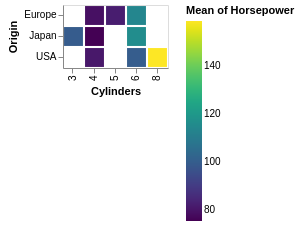

In [25]:
rectHeatmap =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
           
        enc = encoding
                 . position Y [PName "Origin", PmType Nominal]
                 . position X [PName "Cylinders", PmType Ordinal]
                 . color [MName "Horsepower", MmType Quantitative, MAggregate Mean]
                 
    in toVegaLite [dvals [], mark Rect [], enc []]
       
vlShow rectHeatmap

Return to the [Table of Contents](#Table-of-Contents).

## A bar chart encoding color names in the data

From https://vega.github.io/vega-lite/examples/bar_color_disabled_scale.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A bar chart that directly encodes color names in the data.",
  "data": {
    "values": [
      {
        "color": "red",
        "b": 28
      },
      {
        "color": "green",
        "b": 55
      },
      {
        "color": "blue",
        "b": 43
      }
    ]
  },
  "mark": "bar",
  "encoding": {
    "x": {
      "field": "color",
      "type": "nominal"
    },
    "y": {
      "field": "b",
      "type": "quantitative"
    },
    "color": {
      "field": "color",
      "type": "nominal",
      "scale": null
    }
  }
}
```

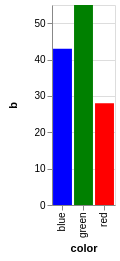

In [26]:
barColorDisabledScale =
    let desc = description "A bar chart that directly encodes color names in the data."
        dvals = dataFromColumns []
                   . dataColumn "color" (Strings ["red", "green", "blue"])
                   . dataColumn "b" (Numbers [28, 55, 43])
         
        enc = encoding
                . position X [PName "color", PmType Nominal]
                . position Y [PName "b", PmType Quantitative]
                . color [MName "color", MmType Ordinal, MScale []]
                
    in toVegaLite [desc, dvals [], mark Bar [], enc []]

vlShow barColorDisabledScale

Return to the [Table of Contents](#Table-of-Contents).

## Table Binned Heatmap

From https://vega.github.io/vega-lite/examples/rect_binned_heatmap.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/movies.json"},
  "mark": "rect",
  "width": 300,
  "height": 200,
  "encoding": {
    "x": {
      "bin": {"maxbins":60},
      "field": "IMDB_Rating",
      "type": "quantitative"
    },
    "y": {
      "bin": {"maxbins": 40},
      "field": "Rotten_Tomatoes_Rating",
      "type": "quantitative"
    },
    "color": {
      "aggregate": "count",
      "type": "quantitative"
    }
  },
  "config": {
    "range": {
      "heatmap": {
        "scheme": "greenblue"
      }
    },
    "view": {
      "stroke": "transparent"
    }
  }
}
```

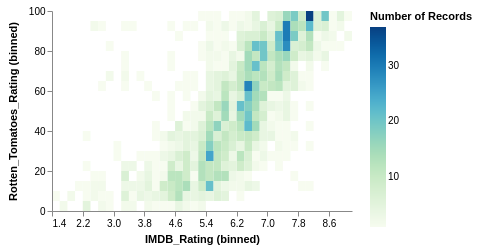

In [27]:
rectBinnedHeatmap =
    let -- dvals = dataFromUrl "data/movies.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/movies.json"
           
        enc = encoding
                 . position X [PName "IMDB_Rating", PmType Quantitative, PBin [MaxBins 60]]
                 . position Y [PName "Rotten_Tomatoes_Rating", PmType Quantitative, PBin [MaxBins 40]]
                 . color [MAggregate Count, MmType Quantitative]
                 
        config = configure
                    . configuration (Range [RHeatmap "greenblue"])
                    . configuration (View [Stroke (Just "transparent")])
           
    in toVegaLite [ dvals [], mark Rect [], width 300, height 200
                  , enc [], config []]
       
vlShow rectBinnedHeatmap

Return to the [Table of Contents](#Table-of-Contents).

## Table Bubble Plot (Github Punch Card)

From https://vega.github.io/vega-lite/examples/circle_github_punchcard.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": { "url": "data/github.csv"},
  "mark": "circle",
  "encoding": {
    "y": {
      "field": "time",
      "type": "ordinal",
      "timeUnit": "day"
    },
    "x": {
      "field": "time",
      "type": "ordinal",
      "timeUnit": "hours"
    },
    "size": {
      "field": "count",
      "type": "quantitative",
      "aggregate": "sum"
    }
  }
}
```

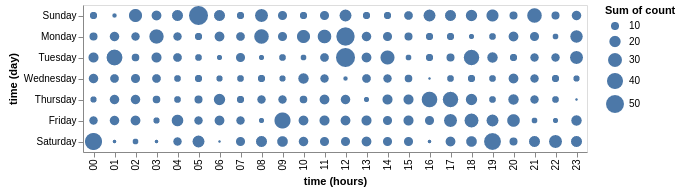

In [28]:
circleGithubPunchcard =
    let -- dvals = dataFromUrl "data/github.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/github.csv"
           
        enc = encoding
                 . position X [PName "time", PmType Ordinal, PTimeUnit Hours]
                 . position Y [PName "time", PmType Ordinal, PTimeUnit Day]
                 . size [MName "count", MAggregate Sum, MmType Quantitative]
                 
    in toVegaLite [ dvals [], mark Circle [], enc [] ]
       
vlShow circleGithubPunchcard

Return to the [Table of Contents](#Table-of-Contents).

## Natural Disasters

From https://vega.github.io/vega-lite/examples/circle_natural_disasters.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {
    "url": "data/disasters.csv"
  },
  "width": 600,
  "height": 400,
  "transform": [
    {"filter": "datum.Entity !== 'All natural disasters'"}
  ],
  "mark": {
    "type": "circle",
    "opacity": 0.8,
    "stroke": "black",
    "strokeWidth": 1
  },
  "encoding": {
    "x": {
      "field": "Year",
      "type": "ordinal",
      "axis": {"labelAngle": 0}
    },
    "y": {"field": "Entity", "type": "nominal", "axis": {"title": ""}},
    "size": {
      "field": "Deaths",
      "type": "quantitative",
      "legend": {"title": "Annual Global Deaths"},
      "scale": {"range": [0, 5000]}
    },
    "color": {"field": "Entity", "type": "nominal", "legend": null}
  }
}
```

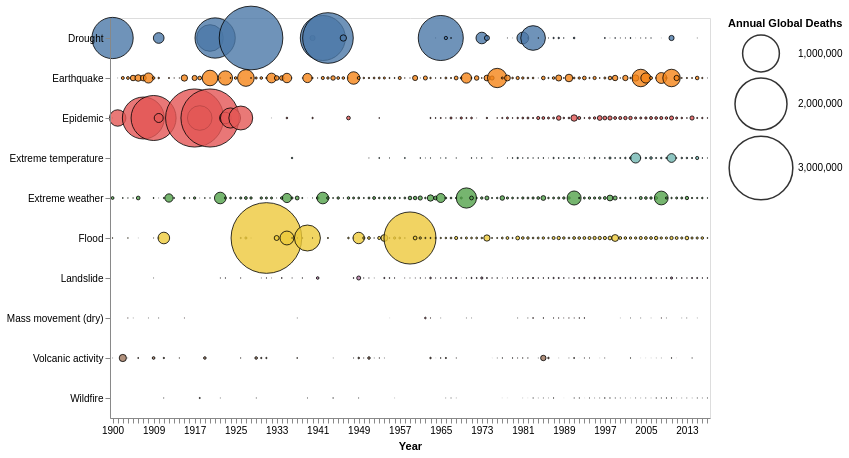

In [29]:
circleNaturalDisasters =
    let -- dvals = dataFromUrl "data/disasters.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/disasters.csv"
           
        trans = transform
                   . filter (FExpr "datum.Entity !== 'All natural disasters'")
                   
        markOpts = [MOpacity 0.8, MStroke "black", MStrokeWidth 1]
           
        enc = encoding
                 . position X [PName "Year", PmType Ordinal, PAxis [AxLabelAngle 0]]
                 . position Y [PName "Entity", PmType Nominal, PAxis [AxTitle ""]]
                 . size [ MName "Deaths", MmType Quantitative
                        , MLegend [LTitle "Annual Global Deaths"]
                        , MScale [SRange (RNumbers [0, 5000])]
                        ]
                 . color [MName "Entity", MmType Nominal, MLegend []]
                 
    in toVegaLite [ dvals [], width 600, height 400, trans []
                  , mark Circle markOpts
                  , enc [] ]
       
vlShow circleNaturalDisasters

Return to the [Table of Contents](#Table-of-Contents).

# Stack

 - [Stacked Bar Chart](#Stacked-Bar-Chart)
 - [Horizontal Stacked Bar Chart](#Horizontal-Stacked-Bar-Chart)
 - [Normalized Stacked Bar Chart](#Normalized-Stacked-Bar-Chart)
 - [Stacked Area Chart](#Stacked-Area-Chart)
 - [Normalized Stacked Area Chart](#Normalized-Stacked-Area-Chart)
 - [Streamgraph](#Streamgraph)
 - [Layered Bar Graph](#Layered-Bar-Graph)
 - [Diverging Stacked Bar Chart](#Diverging-Stacked-Bar-Chart)


## Stacked Bar Chart

From https://vega.github.io/vega-lite/examples/stacked_bar_weather.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/seattle-weather.csv"},
  "mark": "bar",
  "encoding": {
    "x": {
      "timeUnit": "month",
      "field": "date",
      "type": "ordinal",
      "axis": {"title": "Month of the year"}
    },
    "y": {
      "aggregate": "count",
      "type": "quantitative"
    },
    "color": {
      "field": "weather",
      "type": "nominal",
      "scale": {
        "domain": ["sun","fog","drizzle","rain","snow"],
        "range": ["#e7ba52","#c7c7c7","#aec7e8","#1f77b4","#9467bd"]
      },
      "legend": {"title": "Weather type"}
    }
  }
}
```

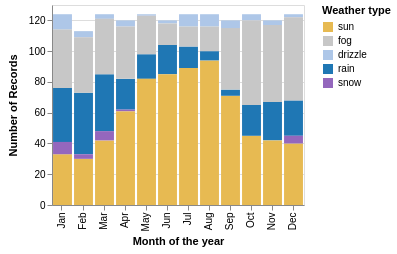

In [30]:
stackedBarWeather =
    let -- dvals = dataFromUrl "data/seattle-weather.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/seattle-weather.csv"
           
        cmap = categoricalDomainMap [ ("sun", "#e7ba52")
                                    , ("fog", "#c7c7c7")
                                    , ("drizzle", "#aec7e8")
                                    , ("rain", "#1f77b4")
                                    , ("snow", "#9467bd")
                                    ]

        enc = encoding
                 . position X [ PName "date", PmType Ordinal, PTimeUnit Month
                              , PAxis [AxTitle "Month of the year"]]
                 . position Y [PAggregate Count, PmType Quantitative]
                 . color [ MName "weather", MmType Nominal
                         , MScale cmap
                         , MLegend [LTitle "Weather type"]
                         ]
                 
    in toVegaLite [dvals [], mark Bar [], enc []]
       
vlShow stackedBarWeather

Return to the [Table of Contents](#Table-of-Contents).

## Horizontal Stacked Bar Chart

From https://vega.github.io/vega-lite/examples/stacked_bar_h.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/barley.json"},
  "mark": "bar",
  "encoding": {
    "x": {"aggregate": "sum", "field": "yield", "type": "quantitative"},
    "y": {"field": "variety", "type": "nominal"},
    "color": {"field": "site", "type": "nominal"}
  }
}
```

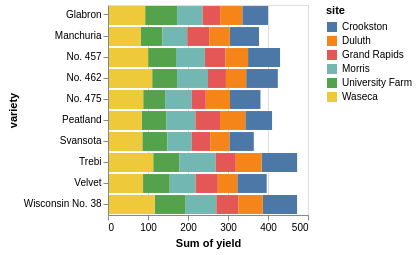

In [31]:
stackedBarH =
    let -- dvals = dataFromUrl "data/barley.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/barley.json"
           
        cmap = categoricalDomainMap [ ("sun", "#e7ba52")
                                    , ("fog", "#c7c7c7")
                                    , ("drizzle", "#aec7e8")
                                    , ("rain", "#1f77b4")
                                    , ("snow", "#9467bd")
                                    ]

        enc = encoding
                 . position X [PName "yield", PmType Quantitative, PAggregate Sum]
                 . position Y [PName "variety", PmType Nominal]
                 . color [MName "site", MmType Nominal]
                 
    in toVegaLite [dvals [], mark Bar [], enc []]
       
vlShow stackedBarH

Return to the [Table of Contents](#Table-of-Contents).

## Normalized Stacked Bar Chart

From https://vega.github.io/vega-lite/examples/stacked_bar_normalize.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": { "url": "data/population.json"},
  "transform": [
    {"filter": "datum.year == 2000"},
    {"calculate": "datum.sex == 2 ? 'Female' : 'Male'", "as": "gender"}
  ],
  "mark": "bar",
  "encoding": {
    "y": {
      "aggregate": "sum", "field": "people", "type": "quantitative",
      "axis": {"title": "population"},
      "stack":  "normalize"
    },
    "x": {
      "field": "age", "type": "ordinal",
      "scale": {"rangeStep": 17}
    },
    "color": {
      "field": "gender", "type": "nominal",
      "scale": {"range": ["#EA98D2", "#659CCA"]}
    }
  }
}
```

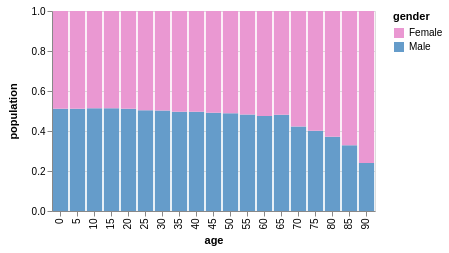

In [32]:
stackedBarNormalize =
    let -- dvals = dataFromUrl "data/population.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/population.json"
           
        trans = transform
                   . filter (FExpr "datum.year == 2000")
                   . calculateAs "datum.sex == 2 ? 'Female' : 'Male'" "gender"
                   
        enc = encoding
                 . position Y [ PName "people", PmType Quantitative, PAggregate Sum
                              , PStack StNormalize
                              , PAxis [AxTitle "population"] 
                              ]
                 . position X [ PName "age", PmType Ordinal
                              , PScale [SRangeStep (Just 17)]
                              ]
                 . color [ MName "gender", MmType Nominal
                         , MScale [SRange (RStrings ["#EA98D2", "#659CCA"])]
                         ]
                 
    in toVegaLite [dvals [], trans [], mark Bar [], enc []]
       
vlShow stackedBarNormalize

Return to the [Table of Contents](#Table-of-Contents).

## Stacked Area Chart

From https://vega.github.io/vega-lite/examples/stacked_area.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Area chart showing weight of cars over time.",
  "width": 300, "height": 200,
  "data": {"url": "data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date", "type": "temporal",
      "axis": {"format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count", "type": "quantitative"
    },
    "color": {
      "field": "series",
      "type": "nominal",
      "scale": {"scheme": "category20b"}
    }
  }
}
```

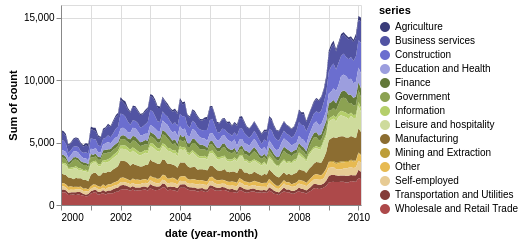

In [33]:
stackedArea =
    let -- dvals = dataFromUrl "data/unemployment-across-industries.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/unemployment-across-industries.json"
        desc = "Area chart showing weight of cars over time."
                   
        enc = encoding
                 . position X [ PName "date", PmType Temporal
                              , PTimeUnit YearMonth
                              , PAxis [AxFormat "%Y"] 
                              ]
                 . position Y [PName "count", PmType Quantitative, PAggregate Sum]
                 . color [ MName "series", MmType Nominal
                         , MScale [SScheme "category20b" []]
                         ]
                 
    in toVegaLite [ description desc, width 300, height 200
                  , dvals [], mark Area [], enc []]
       
vlShow stackedArea

Return to the [Table of Contents](#Table-of-Contents).

## Normalized Stacked Area Chart

From https://vega.github.io/vega-lite/examples/stacked_area_normalize.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/unemployment-across-industries.json"},
  "width": 300, "height": 200,
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date", "type": "temporal",
      "axis": {"domain": false, "format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count","type": "quantitative",
      "axis": null,
      "stack": "normalize"

    },
    "color": {"field":"series", "type":"nominal", "scale":{"scheme": "category20b"}}
  }
}
```

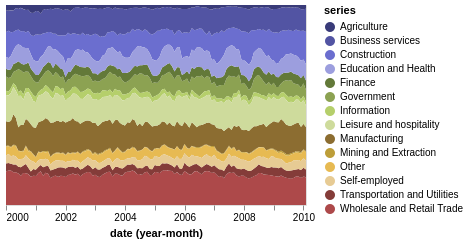

In [34]:
stackedAreaNormalize =
    let -- dvals = dataFromUrl "data/unemployment-across-industries.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/unemployment-across-industries.json"
                   
        enc = encoding
                 . position X [ PName "date", PmType Temporal
                              , PTimeUnit YearMonth
                              , PAxis [AxDomain False, AxFormat "%Y"] 
                              ]
                 . position Y [ PName "count", PmType Quantitative
                              , PAggregate Sum
                              , PStack StNormalize
                              , PAxis []
                              ]
                 . color [ MName "series", MmType Nominal
                         , MScale [SScheme "category20b" []]
                         ]
                 
    in toVegaLite [ width 300, height 200
                  , dvals [], mark Area [], enc []]
       
vlShow stackedAreaNormalize

Return to the [Table of Contents](#Table-of-Contents).

## Streamgraph

From https://vega.github.io/vega-lite/examples/stacked_area_stream.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "width": 300, "height": 200,
  "data": {"url": "data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date", "type": "temporal",
      "axis": {"domain": false, "format": "%Y", "tickSize": 0}
    },
    "y": {
      "aggregate": "sum", "field": "count","type": "quantitative",
      "axis": null,
      "stack": "center"
    },
    "color": {"field":"series", "type":"nominal", "scale":{"scheme": "category20b"}}
  }
}
```

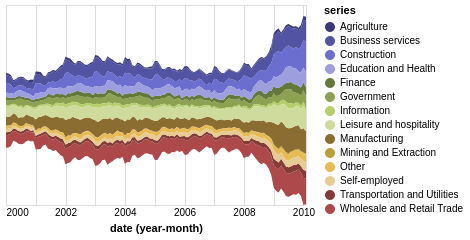

In [35]:
stackedAreaStream =
    let -- dvals = dataFromUrl "data/unemployment-across-industries.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/unemployment-across-industries.json"
                   
        enc = encoding
                 . position X [ PName "date", PmType Temporal
                              , PTimeUnit YearMonth
                              , PAxis [AxDomain False, AxFormat "%Y", AxTickSize 0] 
                              ]
                 . position Y [ PName "count", PmType Quantitative
                              , PAggregate Sum
                              , PStack StCenter
                              , PAxis []
                              ]
                 . color [ MName "series", MmType Nominal
                         , MScale [SScheme "category20b" []]
                         ]
                 
    in toVegaLite [ width 300, height 200
                  , dvals [], mark Area [], enc []]
       
vlShow stackedAreaStream

Return to the [Table of Contents](#Table-of-Contents).

## Layered Bar Graph

From https://vega.github.io/vega-lite/examples/bar_layered_transparent.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A bar chart showing the US population distribution of age groups and gender in 2000.",
  "data": { "url": "data/population.json"},
  "transform": [
    {"filter": "datum.year == 2000"},
    {"calculate": "datum.sex == 2 ? 'Female' : 'Male'", "as": "gender"}
  ],
  "mark": "bar",
  "encoding": {
    "x": {
      "field": "age", "type": "ordinal",
      "scale": {"rangeStep": 17}
    },
    "y": {
      "aggregate": "sum", "field": "people", "type": "quantitative",
      "axis": {"title": "population"},
      "stack": null
    },
    "color": {
      "field": "gender", "type": "nominal",
      "scale": {"range": ["#e377c2","#1f77b4"]}
    },
    "opacity": {"value": 0.7}
  }
}
```

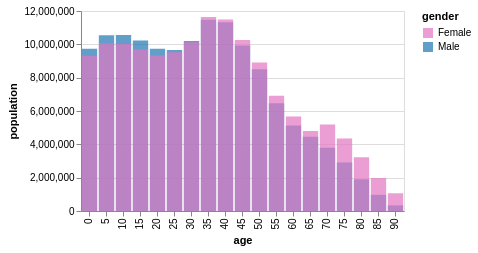

In [36]:
barLayeredTransparent =
    let -- dvals = dataFromUrl "data/population.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/population.json"
        desc = "A bar chart showing the US population distribution of age groups and gender in 2000."
           
        trans = transform 
                   . filter (FExpr "datum.year == 2000")
                   . calculateAs "datum.sex == 2 ? 'Female' : 'Male'" "gender"

        enc = encoding
                 . position X [ PName "age", PmType Ordinal
                              , PScale [SRangeStep (Just 17)]
                              ]
                 . position Y [ PName "people", PmType Quantitative, PAggregate Sum
                              , PStack NoStack
                              , PAxis [AxTitle "population"]
                              ]
                 . color [ MName "gender", MmType Nominal
                         , MScale [SRange (RStrings ["#e377c2", "#1f77b4"])]
                         ]
                 . opacity [MNumber 0.7]
           
    in toVegaLite [ description desc, dvals [], trans []
                  , mark Bar [], enc []
                  ]
       
vlShow barLayeredTransparent

Return to the [Table of Contents](#Table-of-Contents).

## Diverging Stacked Bar Chart

From https://vega.github.io/vega-lite/examples/bar_diverging_stacked.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A diverging stacked bar chart for sentiments towards a set of eight questions, displayed as percentages with neutral responses straddling the 0% mark",
  "data": {
    "values":
    [
      {
        "question": "Question 1",
        "type": "Strongly disagree",
        "value": 24,
        "percentage": 0.7,
        "percentage_start": -19.1,
        "percentage_end": -18.4
      },
      {
        "question": "Question 1",
        "type": "Disagree",
        "value": 294,
        "percentage": 9.1,
        "percentage_start": -18.4,
        "percentage_end": -9.2
      },
      {
        "question": "Question 1",
        "type": "Neither agree nor disagree",
        "value": 594,
        "percentage": 18.5,
        "percentage_start": -9.2,
        "percentage_end": 9.2
      },
      {
        "question": "Question 1",
        "type": "Agree",
        "value": 1927,
        "percentage": 59.9,
        "percentage_start": 9.2,
        "percentage_end": 69.2
      },
      {
        "question": "Question 1",
        "type": "Strongly agree",
        "value": 376,
        "percentage": 11.7,
        "percentage_start": 69.2,
        "percentage_end": 80.9
      },

      {
        "question": "Question 2",
        "type": "Strongly disagree",
        "value": 2,
        "percentage": 18.2,
        "percentage_start": -36.4,
        "percentage_end": -18.2
      },
      {
        "question": "Question 2",
        "type": "Disagree",
        "value": 2,
        "percentage": 18.2,
        "percentage_start": -18.2,
        "percentage_end": 0
      },
      {
        "question": "Question 2",
        "type": "Neither agree nor disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": 0,
        "percentage_end": 0
      },
      {
        "question": "Question 2",
        "type": "Agree",
        "value": 7,
        "percentage": 63.6,
        "percentage_start": 0,
        "percentage_end": 63.6
      },
      {
        "question": "Question 2",
        "type": "Strongly agree",
        "value": 11,
        "percentage": 0,
        "percentage_start": 63.6,
        "percentage_end": 63.6
      },

      {
        "question": "Question 3",
        "type": "Strongly disagree",
        "value": 2,
        "percentage": 20,
        "percentage_start": -30,
        "percentage_end": -10
      },
      {
        "question": "Question 3",
        "type": "Disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": -10,
        "percentage_end": -10
      },
      {
        "question": "Question 3",
        "type": "Neither agree nor disagree",
        "value": 2,
        "percentage": 20,
        "percentage_start": -10,
        "percentage_end": 10
      },
      {
        "question": "Question 3",
        "type": "Agree",
        "value": 4,
        "percentage": 40,
        "percentage_start": 10,
        "percentage_end": 50
      },
      {
        "question": "Question 3",
        "type": "Strongly agree",
        "value": 2,
        "percentage": 20,
        "percentage_start": 50,
        "percentage_end": 70
      },

      {
        "question": "Question 4",
        "type": "Strongly disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": -15.6,
        "percentage_end": -15.6
      },
      {
        "question": "Question 4",
        "type": "Disagree",
        "value": 2,
        "percentage": 12.5,
        "percentage_start": -15.6,
        "percentage_end": -3.1
      },
      {
        "question": "Question 4",
        "type": "Neither agree nor disagree",
        "value": 1,
        "percentage": 6.3,
        "percentage_start": -3.1,
        "percentage_end": 3.1
      },
      {
        "question": "Question 4",
        "type": "Agree",
        "value": 7,
        "percentage": 43.8,
        "percentage_start": 3.1,
        "percentage_end": 46.9
      },
      {
        "question": "Question 4",
        "type": "Strongly agree",
        "value": 6,
        "percentage": 37.5,
        "percentage_start": 46.9,
        "percentage_end": 84.4
      },

      {
        "question": "Question 5",
        "type": "Strongly disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": -10.4,
        "percentage_end": -10.4
      },
      {
        "question": "Question 5",
        "type": "Disagree",
        "value": 1,
        "percentage": 4.2,
        "percentage_start": -10.4,
        "percentage_end": -6.3
      },
      {
        "question": "Question 5",
        "type": "Neither agree nor disagree",
        "value": 3,
        "percentage": 12.5,
        "percentage_start": -6.3,
        "percentage_end": 6.3
      },
      {
        "question": "Question 5",
        "type": "Agree",
        "value": 16,
        "percentage": 66.7,
        "percentage_start": 6.3,
        "percentage_end": 72.9
      },
      {
        "question": "Question 5",
        "type": "Strongly agree",
        "value": 4,
        "percentage": 16.7,
        "percentage_start": 72.9,
        "percentage_end": 89.6
      },

      {
        "question": "Question 6",
        "type": "Strongly disagree",
        "value": 1,
        "percentage": 6.3,
        "percentage_start": -18.8,
        "percentage_end": -12.5
      },
      {
        "question": "Question 6",
        "type": "Disagree",
        "value": 1,
        "percentage": 6.3,
        "percentage_start": -12.5,
        "percentage_end": -6.3
      },
      {
        "question": "Question 6",
        "type": "Neither agree nor disagree",
        "value": 2,
        "percentage": 12.5,
        "percentage_start": -6.3,
        "percentage_end": 6.3
      },
      {
        "question": "Question 6",
        "type": "Agree",
        "value": 9,
        "percentage": 56.3,
        "percentage_start": 6.3,
        "percentage_end": 62.5
      },
      {
        "question": "Question 6",
        "type": "Strongly agree",
        "value": 3,
        "percentage": 18.8,
        "percentage_start": 62.5,
        "percentage_end": 81.3
      },

      {
        "question": "Question 7",
        "type": "Strongly disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": -10,
        "percentage_end": -10
      },
      {
        "question": "Question 7",
        "type": "Disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": -10,
        "percentage_end": -10
      },
      {
        "question": "Question 7",
        "type": "Neither agree nor disagree",
        "value": 1,
        "percentage": 20,
        "percentage_start": -10,
        "percentage_end": 10
      },
      {
        "question": "Question 7",
        "type": "Agree",
        "value": 4,
        "percentage": 80,
        "percentage_start": 10,
        "percentage_end": 90
      },
      {
        "question": "Question 7",
        "type": "Strongly agree",
        "value": 0,
        "percentage": 0,
        "percentage_start": 90,
        "percentage_end": 90
      },

      {
        "question": "Question 8",
        "type": "Strongly disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": 0,
        "percentage_end": 0
      },
      {
        "question": "Question 8",
        "type": "Disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": 0,
        "percentage_end": 0
      },
      {
        "question": "Question 8",
        "type": "Neither agree nor disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": 0,
        "percentage_end": 0
      },
      {
        "question": "Question 8",
        "type": "Agree",
        "value": 0,
        "percentage": 0,
        "percentage_start": 0,
        "percentage_end": 0
      },
      {
        "question": "Question 8",
        "type": "Strongly agree",
        "value": 2,
        "percentage": 100,
        "percentage_start": 0,
        "percentage_end": 100
      }
    ]
  },
  "mark": "bar",
  "encoding": {
    "x": {
      "field": "percentage_start",
      "type": "quantitative",
      "axis": { "title": "Percentage" }
    },
    "x2": {
      "field": "percentage_end",
      "type": "quantitative"
    },
    "y": {
      "field": "question",
      "type": "nominal",
      "axis": {
        "title": "Question",
        "offset": 5,
        "ticks": false,
        "minExtent": 60,
        "domain": false
      }
    },
    "color": {
      "field": "type",
      "type": "nominal",
      "legend": { "title": "Response" },
      "scale": {
        "domain":
          [
            "Strongly disagree",
            "Disagree",
            "Neither agree nor disagree",
            "Agree",
            "Strongly agree"
          ],
        "range": ["#c30d24", "#f3a583", "#cccccc", "#94c6da", "#1770ab"],
        "type": "ordinal"
      }
    }
  }
}
```

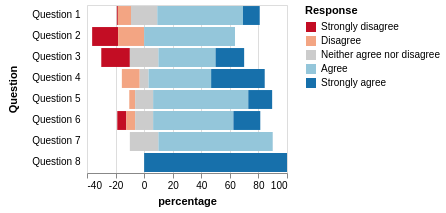

In [37]:
import Data.Monoid ((<>))

barDivergingStacked =
    let desc = "A diverging stacked bar chart for sentiments towards a set of eight questions, displayed as percentages with neutral responses straddling the 0% mark"
        dvals = dataFromRows []
                   . qus "1" "Strongly disagree" 24 0.7 (-19.1) (-18.4)
                   . qus "1" "Disagree" 294 9.1 (-18.4) (-9.2)
                   . qus "1" "Neither agree nor disagree" 594 18.5 (-9.2) 9.2
                   . qus "1" "Agree" 1927 59.5 9.2 69.2
                   . qus "1" "Strongly agree" 376 11.7 69.2 80.9
                   . qus "2" "Strongly disagree" 2 18.2 (-36.4) (-18.2)
                   . qus "2" "Disagree" 2 18.2 (-18.2) 0
                   . qus "2" "Neither agree nor disagree" 0 0 0 0 
                   . qus "2" "Agree" 7 63.6 0 63.6
                   . qus "2" "Strongly agree" 11 0 63.6 63.6
                   . qus "3" "Strongly disagree" 2 20 (-30) (-10)
                   . qus "3" "Disagree" 0 0 (-10) (-10)
                   . qus "3" "Neither agree nor disagree" 2 20 (-10) 10 
                   . qus "3" "Agree" 4 40 10 50
                   . qus "3" "Strongly agree" 2 20 50 70
                   . qus "4" "Strongly disagree" 0 0 (-15.6) (-15.6)
                   . qus "4" "Disagree" 2 12.5 (-15.6) (-3.1)
                   . qus "4" "Neither agree nor disagree" 1 6.3 (-3.1) 3.1
                   . qus "4" "Agree" 7 43.8 3.1 46.9
                   . qus "4" "Strongly agree" 6 37.5 46.9 84.4
                   . qus "5" "Strongly disagree" 0 0 (-10.4) (-10.4)
                   . qus "5" "Disagree" 1 4.2 (-10.4) (-6.3)
                   . qus "5" "Neither agree nor disagree" 3 12.5 (-6.3) 6.3
                   . qus "5" "Agree" 16 66.7 6.3 72.9
                   . qus "5" "Strongly agree" 4 16.7 72.9 89.6
                   . qus "6" "Strongly disagree" 1 6.3 (-18.8) (-12.5)
                   . qus "6" "Disagree" 1 6.3 (-12.5) (-6.3)
                   . qus "6" "Neither agree nor disagree" 2 12.5 (-6.3) 6.3
                   . qus "6" "Agree" 9 56.3 6.3 62.5
                   . qus "6" "Strongly agree" 3 18.8 62.5 81.3
                   . qus "7" "Strongly disagree" 0 0 (-10) (-10)
                   . qus "7" "Disagree" 0 0 (-10) (-10)
                   . qus "7" "Neither agree nor disagree" 1 20 (-10) 10
                   . qus "7" "Agree" 4 80 10 90
                   . qus "7" "Strongly agree" 0 0 90 90
                   . qus "8" "Strongly disagree" 0 0 0 0
                   . qus "8" "Disagree" 0 0 0 0
                   . qus "8" "Neither agree nor disagree" 0 0 0 0
                   . qus "8" "Agree" 0 0 0 0
                   . qus "8" "Strongly agree" 2 100 0 100

        qus n = rval ("Question " <> n)
        rval q t v p ps pe = dataRow [ ("question", Str q), ("type", Str t), ("value", Number v)
                                     , ("percentage", Number p), ("percentage_start", Number ps)
                                     , ("percentage_end", Number pe)
                                     ]
                                        
        cmap = categoricalDomainMap [ ("Strongly disagree", "#c30d24")
                                    , ("Disagree", "#f3a583")
                                    , ("Neither agree nor disagree", "#cccccc")
                                    , ("Agree", "#94c6da")
                                    , ("Strongly agree", "#1770ab")
                                    ]
           
        enc = encoding
                . position X [PName "percentage_start", PmType Quantitative, PAxis [AxTitle "percentage"]]
                . position X2 [PName "percentage_end", PmType Quantitative]
                . position Y [ PName "question", PmType Nominal
                             , PAxis [AxTitle "Question", AxOffset 5, AxTicks False, AxMinExtent 60, AxDomain False]
                             ]
                . color [ MName "type", MmType Nominal
                        , MLegend [LTitle "Response"]
                        , MScale (SType ScOrdinal : cmap)
                        ]

    in toVegaLite [description desc, dvals [], mark Bar [], enc []]

vlShow barDivergingStacked

Return to the [Table of Contents](#Table-of-Contents).

# Trellis

 - [Anscombe's Quartet](#Anscombe's-Quartet)
 - [Trellis Bar Chart](#Trellis-Bar-Chart)
 - [Trellis Stacked Bar Chart](#Trellis-Stacked-Bar-Chart)
 - [Trellis Scatter Plot](#Trellis-Scatter-Plot)
 - [Trellis Histograms](#Trellis-Histograms)
 - [Becker's Barley Trellis Plot](#Becker's-Barley-Trellis-Plot)
 - [Trellis Area](#Trellis-Area)


## Anscombe's Quartet

From https://vega.github.io/vega-lite/examples/trellis_anscombe.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Anscombe's Quartet",
  "data": {"url": "data/anscombe.json"},
  "mark": "circle",
  "encoding": {
    "column": {"field": "Series", "type": "nominal"},
    "x": {
      "field": "X",
      "type": "quantitative",
      "scale": {"zero": false}
    },
    "y": {
      "field": "Y",
      "type": "quantitative",
      "scale": {"zero": false}
    },
    "opacity": {"value": 1}
  }
}
```

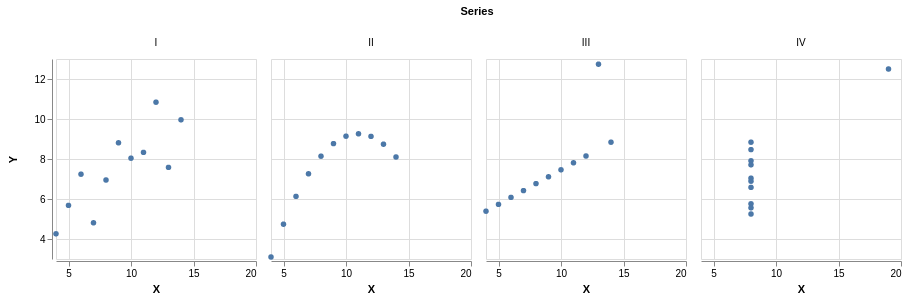

In [38]:
trellisAnscombe =
    let -- dvals = dataFromUrl "data/anscombe.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/anscombe.json"
        desc = "Anscombe's Quartet"

        enc = encoding
                 . column [FName "Series", FmType Nominal]
                 . position X [PName "X", PmType Quantitative, PScale [SZero False]]
                 . position Y [PName "Y", PmType Quantitative, PScale [SZero False]]
                 . opacity [MNumber 1]
                 
    in toVegaLite [description desc, dvals [], mark Circle [], enc []]

vlShow trellisAnscombe

Return to the [Table of Contents](#Table-of-Contents).

## Trellis Bar Chart

From https://vega.github.io/vega-lite/examples/trellis_bar.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A trellis bar chart showing the US population distribution of age groups and gender in 2000.",
  "data": { "url": "data/population.json"},
  "transform": [
    {"filter": "datum.year == 2000"},
    {"calculate": "datum.sex == 2 ? 'Female' : 'Male'", "as": "gender"}
  ],
  "mark": "bar",
  "encoding": {
    "row": {"field": "gender", "type": "nominal"},
    "y": {
      "aggregate": "sum", "field": "people", "type": "quantitative",
      "axis": {"title": "population"}
    },
    "x": {
      "field": "age", "type": "ordinal",
      "scale": {"rangeStep": 17}
    },
    "color": {
      "field": "gender", "type": "nominal",
      "scale": {"range": ["#EA98D2","#659CCA"]}
    }
  }
}
```

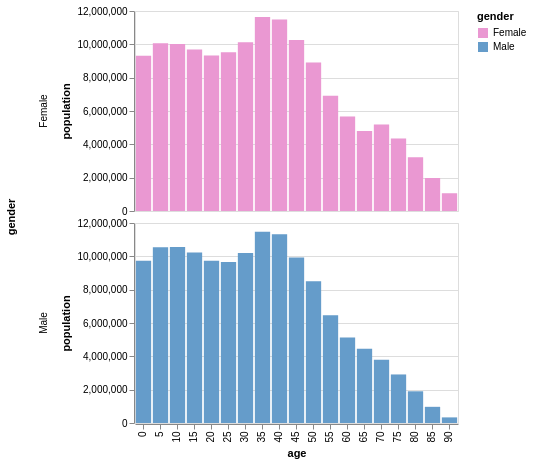

In [39]:
trellisBar =
    let -- dvals = dataFromUrl "data/population.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/population.json"
        desc = "A trellis bar chart showing the US population distribution of age groups and gender in 2000."
           
        trans = transform 
                   . filter (FExpr "datum.year == 2000")
                   . calculateAs "datum.sex == 2 ? 'Female' : 'Male'" "gender"

        enc = encoding
                 . row [FName "gender", FmType Nominal]
                 . position Y [ PName "people", PmType Quantitative, PAggregate Sum
                              , PAxis [AxTitle "population"]
                              ]
                 . position X [PName "age", PmType Ordinal, PScale [SRangeStep (Just 17)]]
                 . color [ MName "gender", MmType Nominal
                         , MScale [SRange (RStrings ["#EA98D2", "#659CCA"])]
                         ]
           
    in toVegaLite [ description desc, dvals [], trans []
                  , mark Bar [], enc []
                  ]
       
vlShow trellisBar

Return to the [Table of Contents](#Table-of-Contents).

## Trellis Stacked Bar Chart

From https://vega.github.io/vega-lite/examples/trellis_stacked_bar.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/barley.json"},
  "mark": "bar",
  "encoding": {
    "column": {"field": "year","type": "ordinal"},
    "x": {"field": "yield","type": "quantitative","aggregate": "sum"},
    "y": {"field": "variety","type": "nominal"},
    "color": {"field": "site","type": "nominal"}
  }
}
```

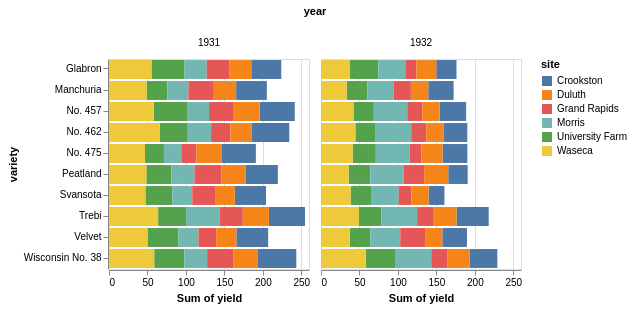

In [40]:
trellisStackedBar =
    let -- dvals = dataFromUrl "data/barley.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/barley.json"
           
        enc = encoding
                 . column [FName "year", FmType Ordinal]
                 . position Y [PName "variety", PmType Nominal]
                 . position X [ PName "yield", PmType Quantitative
                              , PAggregate Sum
                              ]
                 . color [MName "site", MmType Nominal]

    in toVegaLite [dvals [], mark Bar [], enc []]
       
vlShow trellisStackedBar

Return to the [Table of Contents](#Table-of-Contents).

## Trellis Scatter Plot

From https://vega.github.io/vega-lite/examples/trellis_scatter.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/movies.json"},
  "mark": "point",
  "encoding": {
    "column": {"field": "MPAA_Rating","type": "ordinal"},
    "x": {"field": "Worldwide_Gross","type": "quantitative"},
    "y": {"field": "US_DVD_Sales","type": "quantitative"}
  }
}
```

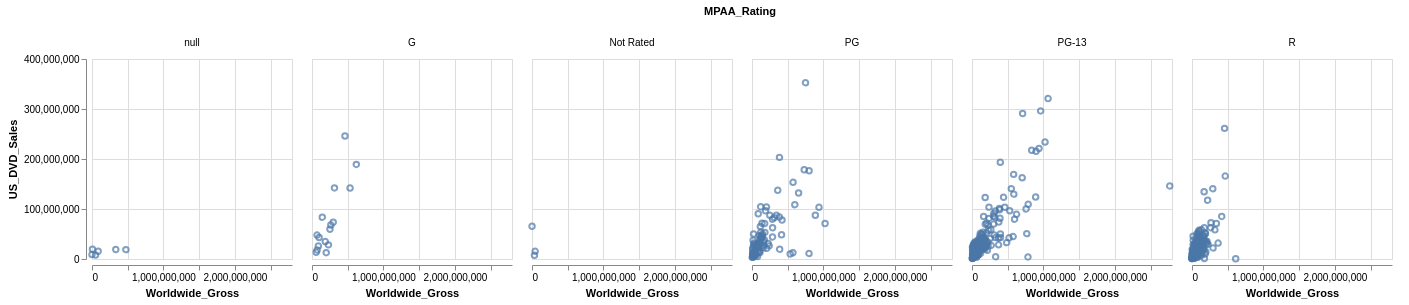

In [41]:
trellisScatter =
    let -- dvals = dataFromUrl "data/movies.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/movies.json" []
        enc = encoding
                 . column [FName "MPAA_Rating", FmType Ordinal]
                 . position X [PName "Worldwide_Gross", PmType Quantitative]
                 . position Y [PName "US_DVD_Sales", PmType Quantitative]

    in toVegaLite [dvals, mark Point [], enc []]

vlShow trellisScatter

Return to the [Table of Contents](#Table-of-Contents).

## Trellis Histograms

From https://vega.github.io/vega-lite/examples/trellis_bar_histogram.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/cars.json"},
  "mark": "bar",
  "encoding": {
    "x": {
      "bin": {"maxbins": 15},
      "field": "Horsepower",
      "type": "quantitative"
    },
    "y": {
      "aggregate": "count",
      "type": "quantitative"
    },
    "row": {"field": "Origin", "type": "nominal"}
  }
}
```

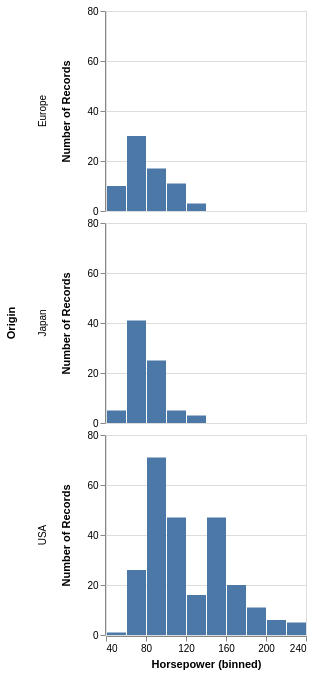

In [42]:
trellisBarHistogram =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
           
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative, PBin [MaxBins 15]]
                 . position Y [PAggregate Count, PmType Quantitative]
                 . row [FName "Origin", FmType Nominal]

    in toVegaLite [dvals [], mark Bar [], enc []]
       
vlShow trellisBarHistogram

Return to the [Table of Contents](#Table-of-Contents).

## Becker's Barley Trellis Plot

From https://vega.github.io/vega-lite/examples/trellis_barley.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "name": "trellis_barley",
  "description": "The Trellis display by Becker et al. helped establish small multiples as a “powerful mechanism for understanding interactions in studies of how a response depends on explanatory variables”. Here we reproduce a trellis of Barley yields from the 1930s, complete with main-effects ordering to facilitate comparison.",
  "data": {"url": "data/barley.json"},
  "mark": "point",
  "encoding": {
    "row": {
      "field": "site", "type": "ordinal"
    },
    "x": {
      "aggregate": "median", "field": "yield", "type": "quantitative",
      "scale": {"zero": false}
    },
    "y": {
      "field": "variety", "type": "ordinal",
      "sort": {"field": "yield","op": "median", "order": "descending"},
      "scale": {"rangeStep": 12}
    },
    "color": {"field": "year", "type": "nominal"}
  }
}
```

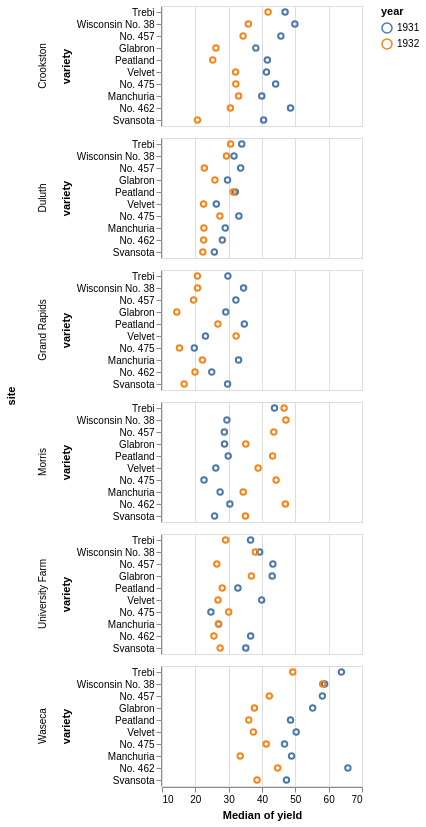

In [43]:
trellisBarley =
    let -- dvals = dataFromUrl "data/barley.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/barley.json"
        desc = "The Trellis display by Becker et al. helped establish small multiples as a “powerful mechanism for understanding interactions in studies of how a response depends on explanatory variables”. Here we reproduce a trellis of Barley yields from the 1930s, complete with main-effects ordering to facilitate comparison."
           
        enc = encoding
                 . row [FName "site", FmType Ordinal]
                 . position X [ PName "yield", PmType Quantitative
                              , PAggregate Median, PScale [SZero False]
                              ]
                 . position Y [ PName "variety", PmType Ordinal
                              , PSort [ ByField "yield"
                                      , Op Median
                                      , Descending
                                      ]
                              , PScale [SRangeStep (Just 12)]
                              ]
                 . color [MName "year", MmType Nominal]

    in toVegaLite [ name "trellis_barley", description desc
                  , dvals [], mark Point [], enc []
                  ]
       
vlShow trellisBarley

Return to the [Table of Contents](#Table-of-Contents).

## Trellis Area

From https://vega.github.io/vega-lite/examples/trellis_area.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Stock prices of four large companies as a small multiples of area charts.",
  "transform": [
      {
          "filter": "datum.symbol !== 'GOOG'"
      }
  ],
  "width": 300,
  "height": 40,
  "data": {
      "url": "data/stocks.csv"
  },
  "mark": "area",
  "encoding": {
      "x": {
          "field": "date",
          "type": "temporal",
          "axis": {
              "format": "%Y",
              "title": "Time",
              "grid": false
          }
      },
      "y": {
          "field": "price",
          "type": "quantitative",
          "axis": {
              "title": "Price",
              "grid": false
          }
      },
      "color": {
          "field": "symbol",
          "type": "nominal",
          "legend": null
      },
      "row": {
          "field": "symbol",
          "type": "nominal",
          "header": {"title": "Symbol"}
      }
  }
}
```

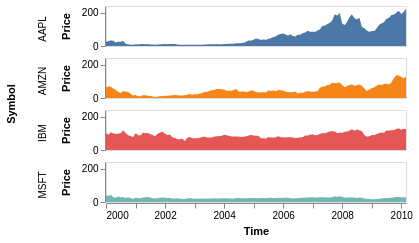

In [44]:
trellisArea =
    let -- dvals = dataFromUrl "data/stocks.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/stocks.csv"
        desc = "Stock prices of four large companies as a small multiples of area charts."
           
        trans = transform
                   . filter (FExpr "datum.symbol !== 'GOOG'")
                   
        enc = encoding
                 . position X [ PName "date", PmType Temporal
                              , PAxis [AxFormat "%Y", AxTitle "Time", AxGrid False]
                              ]
                 . position Y [ PName "price", PmType Quantitative
                              , PAxis [AxTitle "Price", AxGrid False]
                              ]
                 . color [MName "symbol", MmType Nominal, MLegend []]
                 . row [FName "symbol", FmType Nominal, FHeader [HTitle "Symbol"]]
                 
    in toVegaLite [ description desc, dvals [], width 300, height 40
                  , trans [], mark Area [], enc []]
       
vlShow trellisArea

Return to the [Table of Contents](#Table-of-Contents).

# Layering

 - [Simple Bar Chart With Labels](#Simple-Bar-Chart-With-Labels)
 - [Bar chart that highlights values beyond a threshold](#Bar-chart-that-highlights-values-beyond-a-threshold)
 - [Mean overlay over precipitation chart](#Mean-overlay-over-precipitation-chart)
 - [Layering text over heatmap](#Layering-text-over-heatmap)
 - [Box Plot with Min/Max Whiskers](#Box-Plot-with-Min%2FMax-Whiskers)
 - [Tukey Box Plot (1.5 IQR)](#Tukey-Box-Plot-%281.5-IQR%29)
 - [Candlestick Chart](#Candlestick-Chart)
 - [Error Bars showing Confidence Interval](#Error-Bars-showing-Confidence-Interval)
 - [Error Bars showing Standard Deviation](#Error-Bars-showing-Standard-Deviation)
 - [Histogram with a Global Mean Overlay](#Histogram-with-a-Global-Mean-Overlay)
 - [Scatterplot with Mean and Standard Deviation Overlay](#Scatterplot-with-Mean-and-Standard-Deviation-Overlay)
 - [Line chart with Confidence Interval Band](#Line-chart-with-Confidence-Interval-Band)
 - [Falkensee](#Falkensee)
 - [Ranged Dot Plot](#Ranged-Dot-Plot)
 - [Layered Plot with Dual-Axis](#Layered-Plot-with-Dual-Axis)
 - [Horizon Graph](#Horizon-Graph)
 - [Connected Scatterplot (Lines with Custom Paths)](#Connected-Scatterplot-%28Lines-with-Custom-Paths%29)
 - [Carbon Dioxide in the Atmosphere](#Carbon-Dioxide-in-the-Atmosphere)


## Simple Bar Chart With Labels

From https://vega.github.io/vega-lite/examples/layer_bar_labels.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A simple bar chart with embedded data.",
  "data": {
    "values": [
      {"a": "A","b": 28},
      {"a": "B","b": 55},
      {"a": "C","b": 43}
    ]
  },
  "encoding": {
    "y": {"field": "a", "type": "ordinal"},
    "x": {"field": "b", "type": "quantitative"}
  },
  "layer": [{
    "mark": "bar"
  }, {
    "mark": {
      "type": "text",
      "align": "left",
      "baseline": "middle",
      "dx": 3
    },
    "encoding": {
      "text": {"field": "b", "type": "quantitative"}
    }
  }]
}
```

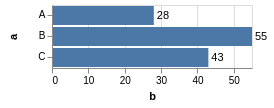

In [45]:
layerBarLabels =
    let desc = description "A simple bar chart with embedded data."
        dvals = dataFromRows []
                   . dataRow [("a", Str "A"), ("b", Number 28)]
                   . dataRow [("a", Str "B"), ("b", Number 55)]
                   . dataRow [("a", Str "C"), ("b", Number 43)]

        enc = encoding
                 . position X [PName "b", PmType Quantitative]
                 . position Y [PName "a", PmType Ordinal]
                 
        encT = encoding
                 . text [TName "b", TmType Quantitative]

        lyr1 = asSpec [mark Bar []]
        lyr2 = asSpec [ mark Text [ MAlign AlignLeft
                                  , MBaseline AlignMiddle, MdX 3 ]
                      , encT [] ]

    in toVegaLite [desc, dvals [], enc [], layer [lyr1, lyr2]]

vlShow layerBarLabels

Return to the [Table of Contents](#Table-of-Contents).

## Bar chart that highlights values beyond a threshold


From https://vega.github.io/vega-lite/examples/layer_bar_annotations.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "The PM2.5 value of Beijing observed 15 days, highlighting the days when PM2.5 level is hazardous to human health. Data source https://chartaccent.github.io/chartaccent.html",
    "layer": [{
      "data": {
        "values": [
          {"Day": 1, "Value": 54.8},
          {"Day": 2, "Value": 112.1},
          {"Day": 3, "Value": 63.6},
          {"Day": 4, "Value": 37.6},
          {"Day": 5, "Value": 79.7},
          {"Day": 6, "Value": 137.9},
          {"Day": 7, "Value": 120.1},
          {"Day": 8, "Value": 103.3},
          {"Day": 9, "Value": 394.8},
          {"Day": 10, "Value": 199.5},
          {"Day": 11, "Value": 72.3},
          {"Day": 12, "Value": 51.1},
          {"Day": 13, "Value": 112.0},
          {"Day": 14, "Value": 174.5},
          {"Day": 15, "Value": 130.5}
        ]
      },
      "layer": [{
        "mark": "bar",
        "encoding": {
          "x": {"field": "Day", "type": "ordinal", "axis": {"labelAngle": 0}},
          "y": {"field": "Value", "type": "quantitative"}
        }
      }, {
        "mark": "bar",
        "transform": [
          {"filter": "datum.Value >= 300"},
          {"calculate": "300", "as": "baseline"}
        ],
        "encoding": {
          "x": {"field": "Day", "type": "ordinal"},
          "y": {"field": "baseline", "type": "quantitative"},
          "y2": {"field": "Value", "type": "quantitative"},
          "color": {"value": "#e45755"}
        }
      }
    ]}, {
      "data": {
         "values": [
          {"ThresholdValue": 300, "Threshold": "hazardous"}
        ]
      },
      "layer": [{
        "mark": "rule",
        "encoding": {
          "y": {"field": "ThresholdValue", "type": "quantitative"}
        }
      }, {
        "mark": {
          "type": "text",
          "align": "left",
          "dx": 215,
          "dy": -5
        },
        "encoding": {
          "y": {
            "field": "ThresholdValue",
            "type": "quantitative",
            "axis": {"title": "PM2.5 Value"}
          },
          "text": {"field": "Threshold", "type": "ordinal"}
        }
      }]
    }
  ]
}
```

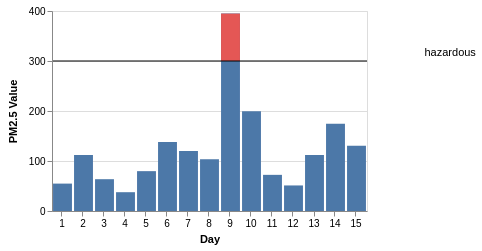

In [46]:
layerBarAnnotations =
    let desc = description "The PM2.5 value of Beijing observed 15 days, highlighting the days when PM2.5 level is hazardous to human health. Data source https://chartaccent.github.io/chartaccent.html"
        dvals1 = dataFromColumns []
                    . dataColumn "Day" (Numbers [1 .. 15])
                    . dataColumn "Value" (Numbers [ 54.8, 112.1, 63.6, 37.6, 79.7, 137.9, 120.1, 103.3
                                                  , 394.8, 199.5, 72.3, 51.1, 112.0, 174.5, 130.5 ])
        dvals2 = dataFromRows []
                    . dataRow [ ("ThresholdValue", Number 300)
                              , ("Threshold", Str "hazardous") ]
        enc11 = encoding
                   . position X [PName "Day", PmType Ordinal, PAxis [AxLabelAngle 0]]
                   . position Y [PName "Value", PmType Quantitative]
                 
        enc12 = encoding
                   . position X [PName "Day", PmType Ordinal]
                   . position Y [PName "baseline", PmType Quantitative]
                   . position Y2 [PName "Value", PmType Quantitative]
                   . color [MString "#e45755"]

        enc21 = encoding
                   . position Y [PName "ThresholdValue", PmType Quantitative]
        enc22 = encoding
                   . position Y [PName "ThresholdValue", PmType Quantitative, PAxis [AxTitle "PM2.5 Value"]]
                   . text [TName "Threshold", TmType Ordinal]
                   
        lyr1 = asSpec [dvals1 [], layer [lyr11, lyr12]]
        lyr11 = asSpec [mark Bar [], enc11 []]
        lyr12 = asSpec [ mark Bar []
                       , (transform
                             . filter (FExpr "datum.Value >= 300")
                             . calculateAs "300" "baseline") []
                       , enc12 []
                       ]

        lyr2 = asSpec [dvals2 [], layer [lyr21, lyr22]]
        lyr21 = asSpec [mark Rule [], enc21 []]
        lyr22 = asSpec [mark Text [MAlign AlignLeft, MdX 215, MdY (-5)], enc22 []]

    in toVegaLite [layer [lyr1, lyr2]]

vlShow layerBarAnnotations

Return to the [Table of Contents](#Table-of-Contents).

## Mean overlay over precipitation chart

From https://vega.github.io/vega-lite/examples/layer_precipitation_mean.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/seattle-weather.csv"},
  "layer": [
    {
      "mark": "bar",
      "encoding": {
        "x": {
          "timeUnit": "month",
          "field": "date",
          "type": "ordinal"

        },
        "y": {
          "aggregate": "mean",
          "field": "precipitation",
          "type": "quantitative"
        }
      }
    },
    {
      "mark": "rule",
      "encoding": {
        "y": {
          "aggregate": "mean",
          "field": "precipitation",
          "type": "quantitative"
        },
        "color": {"value": "red"},
        "size": {"value": 3}
      }
    }
  ]
}
```

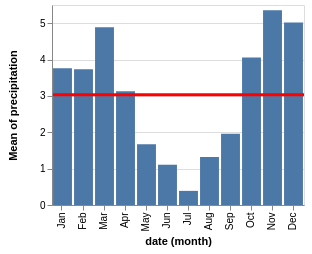

In [47]:
layerPrecipitationMean =
    let -- dvals = dataFromUrl "data/seattle-weather.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/seattle-weather.csv"
           
        enc1 = encoding
                  . position X [PName "date", PmType Ordinal, PTimeUnit Month]
                  . position Y [PName "precipitation", PAggregate Mean, PmType Quantitative]
        enc2 = encoding
                  . position Y [PName "precipitation", PAggregate Mean, PmType Quantitative]
                  . color [MString "red"]
                  . size [MNumber 3]
                  
        lyr1 = asSpec [mark Bar [], enc1 []]
        lyr2 = asSpec [mark Rule [], enc2 []]
                 
    in toVegaLite [dvals [], layer [lyr1, lyr2]]
       
vlShow layerPrecipitationMean

Return to the [Table of Contents](#Table-of-Contents).

## Layering text over heatmap

From https://vega.github.io/vega-lite/examples/layer_text_heatmap.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/cars.json"},
  "encoding": {
    "y": {"field": "Origin", "type": "ordinal"},
    "x": {"field": "Cylinders", "type": "ordinal"}
  },
  "layer": [{
    "mark": "rect",
    "encoding": {
      "color":  {"aggregate": "count", "field": "*", "type": "quantitative"}
    }
  }, {
    "mark": "text",
    "encoding": {
      "text": {"aggregate": "count", "field": "*", "type": "quantitative"},
      "color": {
        "condition": {"test": "datum['count_*'] > 100", "value": "black"},
        "value": "white"
      }
    }
  }],
  "config": {
    "scale": {"bandPaddingInner": 0, "bandPaddingOuter": 0},
    "text": {"baseline": "middle"}
  }
}
```

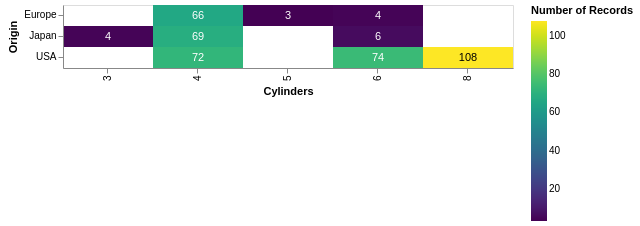

In [48]:
layerTextHeatmap =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"

        enc = encoding
                 . position Y [PName "Origin", PmType Ordinal]
                 . position X [PName "Cylinders", PmType Ordinal]

        enc1 = encoding
                  . color [MName "*", MmType Quantitative, MAggregate Count]
        enc2 = encoding
                  . text [TName "*", TmType Quantitative, TAggregate Count]
                  . color [ MDataCondition (Expr "datum['count_*'] > 100")
                            [MString "black"]
                            [MString "white"]
                          ]
                          
        lyr1 = asSpec [mark Rect [], enc1 []]
        lyr2 = asSpec [mark Text [], enc2 []]
           
        conf = configure
                  . configuration (Scale [SCBandPaddingInner 0, SCBandPaddingOuter 0])
                  . configuration (TextStyle [MBaseline AlignMiddle])
                  
    in toVegaLite [dvals [], enc [], layer [lyr1, lyr2], conf []]
       
vlShow layerTextHeatmap

Return to the [Table of Contents](#Table-of-Contents).

## Box Plot with Min/Max Whiskers


From https://vega.github.io/vega-lite/examples/box-plot_minmax_2D_vertical_normalized.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A vertical 2D box plot showing median, min, and max in the US population distribution of age groups in 2000.",
  "data": {
    "url": "data/population.json"
  },
  "transform": [
    {
      "aggregate": [
        {
          "op": "q1",
          "field": "people",
          "as": "lowerBox"
        },
        {
          "op": "q3",
          "field": "people",
          "as": "upperBox"
        },
        {
          "op": "median",
          "field": "people",
          "as": "midBox"
        },
        {
          "op": "min",
          "field": "people",
          "as": "lowerWhisker"
        },
        {
          "op": "max",
          "field": "people",
          "as": "upperWhisker"
        }
      ],
      "groupby": [
        "age"
      ]
    }
  ],
  "layer": [
    {
      "mark": {
        "type": "rule",
        "style": "boxWhisker"
      },
      "encoding": {
        "y": {
          "field": "lowerWhisker",
          "type": "quantitative",
          "axis": {
            "title": "population"
          }
        },
        "y2": {
          "field": "lowerBox",
          "type": "quantitative"
        },
        "x": {
          "field": "age",
          "type": "ordinal"
        }
      }
    },
    {
      "mark": {
        "type": "rule",
        "style": "boxWhisker"
      },
      "encoding": {
        "y": {
          "field": "upperBox",
          "type": "quantitative"
        },
        "y2": {
          "field": "upperWhisker",
          "type": "quantitative"
        },
        "x": {
          "field": "age",
          "type": "ordinal"
        }
      }
    },
    {
      "mark": {
        "type": "bar",
        "style": "box"
      },
      "encoding": {
        "y": {
          "field": "lowerBox",
          "type": "quantitative"
        },
        "y2": {
          "field": "upperBox",
          "type": "quantitative"
        },
        "x": {
          "field": "age",
          "type": "ordinal"
        },
        "size": {
          "value": 5
        }
      }
    },
    {
      "mark": {
        "type": "tick",
        "style": "boxMid"
      },
      "encoding": {
        "y": {
          "field": "midBox",
          "type": "quantitative"
        },
        "x": {
          "field": "age",
          "type": "ordinal"
        },
        "color": {
          "value": "white"
        },
        "size": {
          "value": 5
        }
      }
    }
  ]
}
```

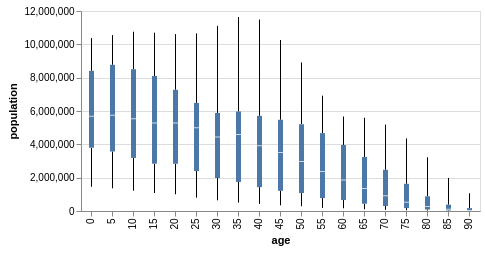

In [49]:
boxPlotMinMax =
    let desc = "A vertical 2D box plot showing median, min, and max in the US population distribution of age groups in 2000."
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/population.json" []

        trans = transform
                   . aggregate [ opAs Q1 "people" "lowerBox", opAs Q3 "people" "upperBox"
                               , opAs Median "people" "midBox"
                               , opAs Min "people" "lowerWhisker"
                               , opAs Max "people" "upperWhisker"
                               ]
                               ["age"]
           
        enc1 = encoding
                  . position Y [ PName "lowerWhisker", PmType Quantitative
                               , PAxis [AxTitle "population"]
                               ]
                  . position Y2 [PName "lowerBox", PmType Quantitative]
                  . position X [PName "age", PmType Ordinal]
        enc2 = encoding
                  . position Y [PName "upperBox", PmType Quantitative]
                  . position Y2 [PName "upperWhisker", PmType Quantitative]
                  . position X [PName "age", PmType Ordinal]
        enc3 = encoding
                  . position Y [PName "lowerBox", PmType Quantitative]
                  . position Y2 [PName "upperBox", PmType Quantitative]
                  . position X [PName "age", PmType Ordinal]
                  . size [MNumber 5]
        enc4 = encoding
                  . position Y [PName "midBox", PmType Quantitative]
                  . position X [PName "age", PmType Ordinal]
                  . size [MNumber 5]
                  . color [MString "white"]
           
        -- Can not seem to get '{type: "rule", style: "boxWhisker"}' but it looks like
        -- the list version works as well.
        lyr1 = asSpec [mark Rule [MStyle ["boxWhisker"]], enc1 []]
        lyr2 = asSpec [mark Rule [MStyle ["boxWhisker"]], enc2 []]
        lyr3 = asSpec [mark Bar [MStyle ["box"]], enc3 []]
        lyr4 = asSpec [mark Tick [MStyle ["boxMid"]], enc4 []]
           
    in toVegaLite [description desc, dvals, trans [], layer [lyr1, lyr2, lyr3, lyr4]]

vlShow boxPlotMinMax

Return to the [Table of Contents](#Table-of-Contents).

## Tukey Box Plot (1.5 IQR)


From https://vega.github.io/vega-lite/examples/box-plot_tukey_2D_vertical_normalized.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A vertical 2D box plot showing median, min, and max in the US population distribution of age groups in 2000.",
  "data": {
    "url": "data/population.json"
  },
  "transform": [
    {
      "aggregate": [
        {
          "op": "q1",
          "field": "people",
          "as": "lowerBox"
        },
        {
          "op": "q3",
          "field": "people",
          "as": "upperBox"
        },
        {
          "op": "median",
          "field": "people",
          "as": "midBox"
        }
      ],
      "groupby": [
        "age"
      ]
    },
    {
      "calculate": "datum.upperBox - datum.lowerBox",
      "as": "IQR"
    },
    {
      "calculate": "datum.lowerBox - datum.IQR * 1.5",
      "as": "lowerWhisker"
    },
    {
      "calculate": "datum.upperBox + datum.IQR * 1.5",
      "as": "upperWhisker"
    }
  ],
  "layer": [
    {
      "mark": {
        "type": "rule",
        "style": "boxWhisker"
      },
      "encoding": {
        "y": {
          "field": "lowerWhisker",
          "type": "quantitative",
          "axis": {
            "title": "population"
          }
        },
        "y2": {
          "field": "lowerBox",
          "type": "quantitative"
        },
        "x": {
          "field": "age",
          "type": "ordinal"
        }
      }
    },
    {
      "mark": {
        "type": "rule",
        "style": "boxWhisker"
      },
      "encoding": {
        "y": {
          "field": "upperBox",
          "type": "quantitative"
        },
        "y2": {
          "field": "upperWhisker",
          "type": "quantitative"
        },
        "x": {
          "field": "age",
          "type": "ordinal"
        }
      }
    },
    {
      "mark": {
        "type": "bar",
        "style": "box"
      },
      "encoding": {
        "y": {
          "field": "lowerBox",
          "type": "quantitative"
        },
        "y2": {
          "field": "upperBox",
          "type": "quantitative"
        },
        "x": {
          "field": "age",
          "type": "ordinal"
        },
        "size": {
          "value": 5
        }
      }
    },
    {
      "mark": {
        "type": "tick",
        "style": "boxMid"
      },
      "encoding": {
        "y": {
          "field": "midBox",
          "type": "quantitative"
        },
        "x": {
          "field": "age",
          "type": "ordinal"
        },
        "color": {
          "value": "white"
        },
        "size": {
          "value": 5
        }
      }
    }
  ]
}
```

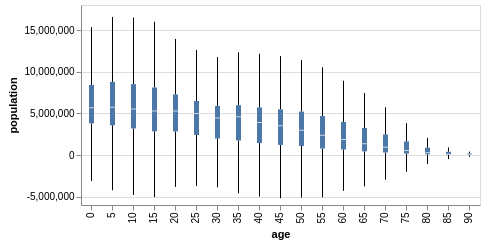

In [50]:
boxPlotMinMaxTukey =
    let desc = "A vertical 2D box plot showing median, min, and max in the US population distribution of age groups in 2000."
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/population.json" []

        trans = transform
                   . aggregate [ opAs Q1 "people" "lowerBox", opAs Q3 "people" "upperBox"
                               , opAs Median "people" "midBox"
                               ]
                               ["age"]
                   . calculateAs "datum.upperBox - datum.lowerBox" "IQR"
                   . calculateAs "datum.lowerBox - datum.IQR * 1.5" "lowerWhisker"
                   . calculateAs "datum.upperBox + datum.IQR * 1.5" "upperWhisker"
           
        enc1 = encoding
                  . position Y [ PName "lowerWhisker", PmType Quantitative
                               , PAxis [AxTitle "population"]
                               ]
                  . position Y2 [PName "lowerBox", PmType Quantitative]
                  . position X [PName "age", PmType Ordinal]
        enc2 = encoding
                  . position Y [PName "upperBox", PmType Quantitative]
                  . position Y2 [PName "upperWhisker", PmType Quantitative]
                  . position X [PName "age", PmType Ordinal]
        enc3 = encoding
                  . position Y [PName "lowerBox", PmType Quantitative]
                  . position Y2 [PName "upperBox", PmType Quantitative]
                  . position X [PName "age", PmType Ordinal]
                  . size [MNumber 5]
        enc4 = encoding
                  . position Y [PName "midBox", PmType Quantitative]
                  . position X [PName "age", PmType Ordinal]
                  . size [MNumber 5]
                  . color [MString "white"]
           
        -- Can not seem to get '{type: "rule", style: "boxWhisker"}' but it looks like
        -- the list version works as well.
        lyr1 = asSpec [mark Rule [MStyle ["boxWhisker"]], enc1 []]
        lyr2 = asSpec [mark Rule [MStyle ["boxWhisker"]], enc2 []]
        lyr3 = asSpec [mark Bar [MStyle ["box"]], enc3 []]
        lyr4 = asSpec [mark Tick [MStyle ["boxMid"]], enc4 []]
           
    in toVegaLite [description desc, dvals, trans [], layer [lyr1, lyr2, lyr3, lyr4]]

vlShow boxPlotMinMaxTukey

Return to the [Table of Contents](#Table-of-Contents).

# Candlestick Chart

From https://vega.github.io/vega-lite/examples/layer_candlestick.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "width": 320,
  "description":"A candlestick chart inspired from Protovis(http://mbostock.github.io/protovis/ex/candlestick.html)",
  "data": {
    "values": [
      {
        "date": "2009-06-01",
        "open": 28.7,
        "high": 30.05,
        "low": 28.45,
        "close": 30.04,
        "signal": "short",
        "ret": -4.89396411092985
      },
      {
        "date": "2009-06-02",
        "open": 30.04,
        "high": 30.13,
        "low": 28.3,
        "close": 29.63,
        "signal": "short",
        "ret": -0.322580645161295
      },
      {
        "date": "2009-06-03",
        "open": 29.62,
        "high": 31.79,
        "low": 29.62,
        "close": 31.02,
        "signal": "short",
        "ret": 3.68663594470045
      },
      {
        "date": "2009-06-04",
        "open": 31.02,
        "high": 31.02,
        "low": 29.92,
        "close": 30.18,
        "signal": "short",
        "ret": 4.51010886469673
      },
      {
        "date": "2009-06-05",
        "open": 29.39,
        "high": 30.81,
        "low": 28.85,
        "close": 29.62,
        "signal": "short",
        "ret": 6.08424336973478
      },
      {
        "date": "2009-06-08",
        "open": 30.84,
        "high": 31.82,
        "low": 26.41,
        "close": 29.77,
        "signal": "short",
        "ret": 1.2539184952978
      },
      {
        "date": "2009-06-09",
        "open": 29.77,
        "high": 29.77,
        "low": 27.79,
        "close": 28.27,
        "signal": "short",
        "ret": -5.02431118314424
      },
      {
        "date": "2009-06-10",
        "open": 26.9,
        "high": 29.74,
        "low": 26.9,
        "close": 28.46,
        "signal": "short",
        "ret": -5.46623794212217
      },
      {
        "date": "2009-06-11",
        "open": 27.36,
        "high": 28.11,
        "low": 26.81,
        "close": 28.11,
        "signal": "short",
        "ret": -8.3743842364532
      },
      {
        "date": "2009-06-12",
        "open": 28.08,
        "high": 28.5,
        "low": 27.73,
        "close": 28.15,
        "signal": "short",
        "ret": -5.52763819095477
      },
      {
        "date": "2009-06-15",
        "open": 29.7,
        "high": 31.09,
        "low": 29.64,
        "close": 30.81,
        "signal": "long",
        "ret": 3.4920634920635
      },
      {
        "date": "2009-06-16",
        "open": 30.81,
        "high": 32.75,
        "low": 30.07,
        "close": 32.68,
        "signal": "short",
        "ret": 0.155038759689914
      },
      {
        "date": "2009-06-17",
        "open": 31.19,
        "high": 32.77,
        "low": 30.64,
        "close": 31.54,
        "signal": "short",
        "ret": 5.82822085889571
      },
      {
        "date": "2009-06-18",
        "open": 31.54,
        "high": 31.54,
        "low": 29.6,
        "close": 30.03,
        "signal": "short",
        "ret": 8.17610062893082
      },
      {
        "date": "2009-06-19",
        "open": 29.16,
        "high": 29.32,
        "low": 27.56,
        "close": 27.99,
        "signal": "short",
        "ret": 8.59872611464968
      },
      {
        "date": "2009-06-22",
        "open": 30.4,
        "high": 32.05,
        "low": 30.3,
        "close": 31.17,
        "signal": "short",
        "ret": 15.4907975460123
      },
      {
        "date": "2009-06-23",
        "open": 31.3,
        "high": 31.54,
        "low": 27.83,
        "close": 30.58,
        "signal": "short",
        "ret": 11.7370892018779
      },
      {
        "date": "2009-06-24",
        "open": 30.58,
        "high": 30.58,
        "low": 28.79,
        "close": 29.05,
        "signal": "long",
        "ret": -10.4234527687296
      },
      {
        "date": "2009-06-25",
        "open": 29.45,
        "high": 29.56,
        "low": 26.3,
        "close": 26.36,
        "signal": "long",
        "ret": 0
      },
      {
        "date": "2009-06-26",
        "open": 27.09,
        "high": 27.22,
        "low": 25.76,
        "close": 25.93,
        "signal": "long",
        "ret": 0
      },
      {
        "date": "2009-06-29",
        "open": 25.93,
        "high": 27.18,
        "low": 25.29,
        "close": 25.35,
        "signal": "long",
        "ret": 5.26315789473684
      },
      {
        "date": "2009-06-30",
        "open": 25.36,
        "high": 27.38,
        "low": 25.02,
        "close": 26.35,
        "signal": "long",
        "ret": 6.73758865248228
      }
    ]
  },
  "encoding": {
    "x": {
      "field": "date",
      "type": "temporal",
      "timeUnit": "yearmonthdate",
      "scale": {"domain": [{"month": 5, "date": 31, "year": 2009}, {"month": 7, "date": 1, "year": 2009}]},
      "axis": {
        "format": "%m/%d",
        "title": "Date in 2009"
      }
    },
    "color": {
      "condition": {
        "test": "datum.open < datum.close",
        "value": "#06982d"
      },
      "value": "#ae1325"
    }
  },
  "layer": [
    {
      "mark": "rule",
      "encoding": {
        "y": {"field": "low", "type": "quantitative", "scale": {"zero": false}},
        "y2": {"field": "high", "type": "quantitative"}
      }
    },
    {
      "mark": "bar",
      "encoding": {
        "y": {"field": "open", "type": "quantitative"},
        "y2": {"field": "close", "type": "quantitative"},
        "size": {"value": 5}
      }
    }
  ]
}
```

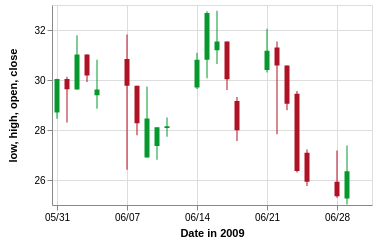

In [51]:
layerCandlestick =
    let desc = "A candlestick chart inspired from Protovis(http://mbostock.github.io/protovis/ex/candlestick.html)"

        dvals = dataFromRows []
                   . rw "2009-06-01" 28.7 30.05 28.45 30.04 "short" (-4.89396411092985)
                   . rw "2009-06-02" 30.04 30.13 28.3 29.63 "short" (-0.322580645161295)
                   . rw "2009-06-03" 29.62 31.79 29.62 31.02 "short" 3.68663594470045
                   . rw "2009-06-04" 31.02 31.02 29.92 30.18 "short" 4.51010886469673
                   . rw "2009-06-05" 29.39 30.81 28.85 29.62 "short" 6.08424336973478
                   . rw "2009-06-08" 30.84 31.82 26.41 29.77 "short" 1.2539184952978
                   . rw "2009-06-09" 29.77 29.77 27.79 28.27 "short" (-5.02431118314424)
                   . rw "2009-06-10" 26.9 29.74 26.9 28.46 "short" (-5.46623794212217)
                   . rw "2009-06-11" 27.36 28.11 26.81 28.11 "short" (-8.3743842364532)
                   . rw "2009-06-12" 28.08 28.5 27.73 28.15 "short" (-5.52763819095477)
                   . rw "2009-06-15" 29.7 31.09 29.64 30.81 "long" 3.4920634920635
                   . rw "2009-06-16" 30.81 32.75 30.07 32.68 "short" 0.155038759689914
                   . rw "2009-06-17" 31.19 32.77 30.64 31.54 "short" 5.82822085889571
                   . rw "2009-06-18" 31.54 31.54 29.6 30.03 "short" 8.17610062893082
                   . rw "2009-06-19" 29.16 29.32 27.56 27.99 "short" 8.59872611464968
                   . rw "2009-06-22" 30.4 32.05 30.3 31.17 "short" 15.4907975460123
                   . rw "2009-06-23" 31.3 31.54 27.83 30.58 "short" 11.7370892018779
                   . rw "2009-06-24" 30.58 30.58 28.79 29.05 "long" (-10.4234527687296)
                   . rw "2009-06-25" 29.45 29.56 26.3 26.36 "long" 0
                   . rw "2009-06-26" 27.09 27.22 25.76 25.93 "long" 0
                   . rw "2009-06-29" 25.93 27.18 25.29 25.35 "long" 5.26315789473684
                   . rw "2009-06-30" 25.26 27.38 25.02 26.35 "long" 6.73758865248228

        rw d o h l c s r = dataRow [ ("date", Str d), ("open", Number o), ("high", Number h)
                                   , ("low", Number l), ("close", Number c), ("signal", Str s), ("ret", Number r)]

        start = [DTYear 2009, DTMonth May, DTDate 31]
        end = [DTYear 2009, DTMonth Jul, DTDate 1]
        enc = encoding
                 . position X [ PName "date", PmType Temporal, PTimeUnit YearMonthDate
                              , PScale [SDomain (DDateTimes [start, end])]
                              , PAxis [AxFormat "%m/%d", AxTitle "Date in 2009"]
                              ]
                 . color [ MDataCondition (Expr "datum.open < datum.close")
                           [MString "#06982d"]
                           [MString "#ae1325"]
                         ]
                        
        enc1 = encoding
                  . position Y [PName "low", PmType Quantitative, PScale [SZero False]]
                  . position Y2 [PName "high", PmType Quantitative]
        enc2 = encoding
                  . position Y [PName "open", PmType Quantitative]
                  . position Y2 [PName "close", PmType Quantitative]
                  . size [MNumber 5]
           
        lyr1 = asSpec [mark Rule [], enc1 []]
        lyr2 = asSpec [mark Bar [], enc2 []]
           
    in toVegaLite [description desc, width 320, dvals [], enc [], layer [lyr1, lyr2]]

vlShow layerCandlestick

Return to the [Table of Contents](#Table-of-Contents).

## Error Bars showing Confidence Interval


From https://vega.github.io/vega-lite/examples/layer_error_bars.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/barley.json"},
  "layer": [{
    "mark": {"type": "point", "filled": true},
    "encoding": {
      "x": {
        "aggregate": "mean", "field": "yield", "type": "quantitative",
        "scale": {"zero": false},
        "axis": {"title": "Barley Yield"}
      },
      "y": {
        "field": "variety", "type": "ordinal"
      },
      "color": {"value": "black"}
    }
  }, {
    "mark": "rule",
    "encoding": {
      "x": {
        "aggregate": "ci0", "field": "yield", "type": "quantitative"
      },
      "x2": {
        "aggregate": "ci1", "field": "yield", "type": "quantitative"
      },
      "y": {
        "field": "variety", "type": "ordinal"
      }
    }
  }]
}
```

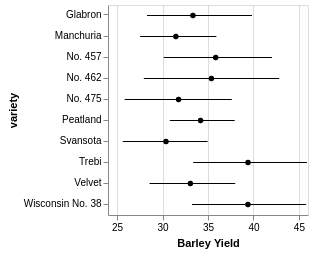

In [52]:
layerErrorBars =
    let -- dvals = dataFromUrl "data/barley.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/barley.json"

        enc1 = encoding
                  . position X [ PName "yield", PmType Quantitative, PAggregate Mean
                               , PScale [SZero False]
                               , PAxis [AxTitle "Barley Yield"]
                               ]
                  . position Y [ PName "variety", PmType Ordinal]
                  . color [MString "black"]
        enc2 = encoding
                  . position X [PName "yield", PmType Quantitative, PAggregate CI0]
                  . position X2 [PName "yield", PmType Quantitative, PAggregate CI1]
                  . position Y [PName "variety", PmType Ordinal]
                  
        lyr1 = asSpec [mark Point [MFilled True], enc1 []]
        lyr2 = asSpec [mark Rule [], enc2 []]
           
    in toVegaLite [dvals [], layer [lyr1, lyr2]]
       
vlShow layerErrorBars

Return to the [Table of Contents](#Table-of-Contents).

## Error Bars showing Standard Deviation

From https://vega.github.io/vega-lite/examples/layer_error_bars_dev.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/barley.json"},

  "transform": [
    {
      "aggregate": [
        {"op": "mean", "field": "yield", "as": "mean"},
        {"op": "stdev", "field": "yield", "as": "stdev"}
      ],
      "groupby": ["variety"]
    },
    {
      "calculate": "datum.mean-datum.stdev",
      "as": "lower"
    },
    {
      "calculate": "datum.mean+datum.stdev",
      "as": "upper"
    }
  ],
  "layer": [{
    "mark": {"type": "point", "filled": true},
    "encoding": {
      "x": {
        "field": "mean", "type": "quantitative",
        "scale": {"zero": false},
        "axis": {"title": "Barley Yield"}
      },
      "y": {"field": "variety", "type": "ordinal"},
      "color": {"value": "black"}
    }
  }, {
    "mark": "rule",
    "encoding": {
      "x": {"field": "upper", "type": "quantitative"},
      "x2": {"field": "lower", "type": "quantitative"},
      "y": {"field": "variety", "type": "ordinal"}
    }
  }]
}
```

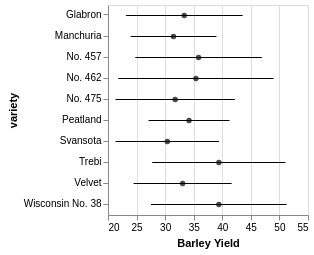

In [53]:
layerErrorBarsDev =
    let -- dvals = dataFromUrl "data/barley.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/barley.json"

        trans = transform
                   . aggregate
                     [opAs Mean "yield" "mean", opAs Stdev "yield" "stdev"]
                     ["variety"]
                   . calculateAs "datum.mean-datum.stdev" "lower"
                   . calculateAs "datum.mean+datum.stdev" "upper"
                  
        enc1 = encoding
                  . position X [ PName "mean", PmType Quantitative
                               , PScale [SZero False]
                               , PAxis [AxTitle "Barley Yield"]
                               ]
                  . position Y [ PName "variety", PmType Ordinal]
                  . color [MString "black"]
        enc2 = encoding
                  . position X [PName "upper", PmType Quantitative]
                  . position X2 [PName "lower", PmType Quantitative]
                  . position Y [PName "variety", PmType Ordinal]
                  
        lyr1 = asSpec [mark Point [MFilled True], enc1 []]
        lyr2 = asSpec [mark Rule [], enc2 []]
           
    in toVegaLite [dvals [], trans [], layer [lyr1, lyr2]]
       
vlShow layerErrorBarsDev

Return to the [Table of Contents](#Table-of-Contents).

## Histogram with a Global Mean Overlay

From https://vega.github.io/vega-lite/examples/layer_histogram_global_mean.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/movies.json"},
  "layer": [{
    "mark": "bar",
    "encoding": {
      "x": {
        "bin": true,
        "field": "IMDB_Rating",
        "type": "quantitative"
      },
      "y": {
        "aggregate": "count",
        "type": "quantitative"
      }
    }
  },{
    "mark": "rule",
    "encoding": {
      "x": {
        "aggregate": "mean",
        "field": "IMDB_Rating",
        "type": "quantitative"
      },
      "color": {"value": "red"},
      "size": {"value": 5}
    }
  }]
}
```

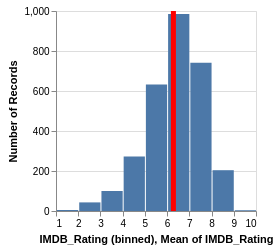

In [54]:
layerHistogramGlobalMean =
    let -- dvals = dataFromUrl "data/movies.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/movies.json" []
           
        enc1 = encoding
                 . position Y [PAggregate Count, PmType Quantitative]
                 . position X [ PName "IMDB_Rating", PmType Quantitative
                              , PBin []
                              ]
        enc2 = encoding
                  . position X [PName "IMDB_Rating", PmType Quantitative, PAggregate Mean]
                  . color [MString "red"]
                  . size [MNumber 5]
                  
        lyr1 = asSpec [mark Bar [], enc1 []]
        lyr2 = asSpec [mark Rule [], enc2 []]
           
    in toVegaLite [dvals, layer [lyr1, lyr2]]

vlShow layerHistogramGlobalMean

Return to the [Table of Contents](#Table-of-Contents).

## Scatterplot with Mean and Standard Deviation Overlay

From https://vega.github.io/vega-lite/examples/layer_global_mean_dev.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A scatterplot showing horsepower and miles per gallons for various cars.",
  "data": {"url": "data/cars.json"},
  "layer": [{
    "mark": "point",
    "encoding": {
      "x": {"field": "Horsepower","type": "quantitative"},
      "y": {"field": "Miles_per_Gallon","type": "quantitative"}
    }
  },{
    "transform": [
      {
        "aggregate": [
          {"op": "mean", "field": "Miles_per_Gallon", "as": "mean_MPG"},
          {"op": "stdev", "field": "Miles_per_Gallon", "as": "dev_MPG"}
        ],
        "groupby": []
      },
      {
        "calculate": "datum.mean_MPG-datum.dev_MPG",
        "as": "lower"
      },
      {
        "calculate": "datum.mean_MPG+datum.dev_MPG",
        "as": "upper"
      }
    ],
    "layer": [{
      "mark": "rule",
      "encoding": {
        "y": {"field": "mean_MPG","type": "quantitative", "axis": null}
      }
    },{
      "mark": "rect",
      "encoding": {
        "y": {"field": "lower","type": "quantitative",
          "axis": null},
        "y2": {"field": "upper","type": "quantitative"},
        "opacity": {"value": 0.2}
      }
    }]
  }]
}
```

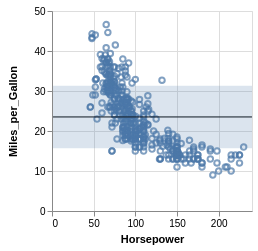

In [55]:
layerGlobalMeanDev =
    let desc = "A scatterplot showing horsepower and miles per gallons for various cars."

        -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
           
        enc1 = encoding
                  . position X [PName "Horsepower", PmType Quantitative]
                  . position Y [PName "Miles_per_Gallon", PmType Quantitative]
                 
        lyr1 = asSpec [mark Point [], enc1 []]
           
        trans2 = transform
                    . aggregate [ opAs Mean "Miles_per_Gallon" "mean_MPG"
                                , opAs Stdev "Miles_per_Gallon" "dev_MPG"
                                ]
                                []
                    . calculateAs "datum.mean_MPG-datum.dev_MPG" "lower"
                    . calculateAs "datum.mean_MPG+datum.dev_MPG" "upper"
                    
        enc21 = encoding
                   . position Y [PName "mean_MPG", PmType Quantitative, PAxis []]
        enc22 = encoding
                   . position Y [PName "lower", PmType Quantitative, PAxis []]
                   . position Y2 [PName "upper", PmType Quantitative]
                   . opacity [MNumber 0.2]
                   
        lyr2 = asSpec [trans2 []
                      , layer [ asSpec [mark Rule [], enc21 []]
                              , asSpec [mark Rect [], enc22 []]
                              ]
                      ]

    in toVegaLite [description desc, dvals [], layer [lyr1, lyr2]]
       
vlShow layerGlobalMeanDev

Return to the [Table of Contents](#Table-of-Contents).

## Line chart with Confidence Interval Band

From https://vega.github.io/vega-lite/examples/layer_area_ci.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/cars.json"},
  "layer": [
    {
      "mark": "area",
      "encoding": {
        "x": {
          "field": "Year",
          "type": "temporal",
          "timeUnit": "year"
        },
        "y": {
          "aggregate": "ci0",
          "field": "Miles_per_Gallon",
          "type": "quantitative",
          "axis": {"title": "Mean of Miles per Gallon (95% CIs)"}
        },
        "y2": {
          "aggregate": "ci1",
          "field": "Miles_per_Gallon",
          "type": "quantitative"
        },
        "opacity": {"value": 0.3}
      }
    },
    {
      "mark": "line",
      "encoding": {
        "x": {
          "field": "Year",
          "type": "temporal",
          "timeUnit": "year"
        },
        "y": {
          "aggregate": "mean",
          "field": "Miles_per_Gallon",
          "type": "quantitative"
        }
      }
    }
  ]
}
```

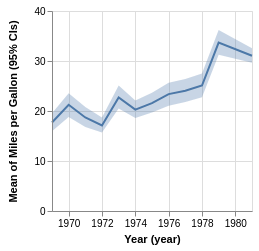

In [56]:
layerAreaCI =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
           
        enc1 = encoding
                  . position X [PName "Year", PmType Temporal, PTimeUnit Year]
                  . position Y [ PName "Miles_per_Gallon", PmType Quantitative
                               , PAggregate CI0, PAxis [AxTitle "Mean of Miles per Gallon (95% CIs)"]
                               ]
                  . position Y2 [PName "Miles_per_Gallon", PmType Quantitative, PAggregate CI1]
                  . opacity [MNumber 0.3]
                  
        lyr1 = asSpec [mark Area [], enc1 []]
           
        enc2 = encoding
                  . position X [PName "Year", PmType Temporal, PTimeUnit Year]
                  . position Y [PName "Miles_per_Gallon", PmType Quantitative, PAggregate Mean]
                   
        lyr2 = asSpec [mark Line [], enc2 []]

    in toVegaLite [dvals [], layer [lyr1, lyr2]]
       
vlShow layerAreaCI

Return to the [Table of Contents](#Table-of-Contents).

# Falkensee

From https://vega.github.io/vega-lite/examples/layer_falkensee.html (with a small tweak to make the rectangles slightly opaque, just because I can):

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "The population of the German city of Falkensee over time",
  "width": 500,
  "data": {
    "values": [
      {"year": "1875", "population": 1309},
      {"year": "1890", "population": 1558},
      {"year": "1910", "population": 4512},
      {"year": "1925", "population": 8180},
      {"year": "1933", "population": 15915},
      {"year": "1939", "population": 24824},
      {"year": "1946", "population": 28275},
      {"year": "1950", "population": 29189},
      {"year": "1964", "population": 29881},
      {"year": "1971", "population": 26007},
      {"year": "1981", "population": 24029},
      {"year": "1985", "population": 23340},
      {"year": "1989", "population": 22307},
      {"year": "1990", "population": 22087},
      {"year": "1991", "population": 22139},
      {"year": "1992", "population": 22105},
      {"year": "1993", "population": 22242},
      {"year": "1994", "population": 22801},
      {"year": "1995", "population": 24273},
      {"year": "1996", "population": 25640},
      {"year": "1997", "population": 27393},
      {"year": "1998", "population": 29505},
      {"year": "1999", "population": 32124},
      {"year": "2000", "population": 33791},
      {"year": "2001", "population": 35297},
      {"year": "2002", "population": 36179},
      {"year": "2003", "population": 36829},
      {"year": "2004", "population": 37493},
      {"year": "2005", "population": 38376},
      {"year": "2006", "population": 39008},
      {"year": "2007", "population": 39366},
      {"year": "2008", "population": 39821},
      {"year": "2009", "population": 40179},
      {"year": "2010", "population": 40511},
      {"year": "2011", "population": 40465},
      {"year": "2012", "population": 40905},
      {"year": "2013", "population": 41258},
      {"year": "2014", "population": 41777}
    ],
    "format": {
      "parse": {"year": "date:'%Y'"}
    }
  },
  "layer": [
    {
      "mark": "rect",
      "data": {
        "values": [
          {
            "start": "1933",
            "end": "1945",
            "event": "Nazi Rule"
          },
          {
            "start": "1948",
            "end": "1989",
            "event": "GDR (East Germany)"
          }
        ],
        "format": {
          "parse": {"start": "date:'%Y'", "end": "date:'%Y'"}
        }
      },
      "encoding": {
        "x": {
          "field": "start",
          "type": "temporal",
          "timeUnit": "year",
          "axis": null
        },
        "x2": {
          "field": "end",
          "type": "temporal",
          "timeUnit": "year"
        },
        "color": {"field": "event", "type": "nominal"}
      }
    },
    {
      "mark": "line",
      "encoding": {
        "x": {
          "field": "year",
          "type": "temporal",
          "timeUnit": "year"
        },
        "y": {"field": "population", "type": "quantitative"},
        "color": {"value": "#333"}
      }
    },
    {
      "mark": "point",
      "encoding": {
        "x": {
          "field": "year",
          "type": "temporal",
          "timeUnit": "year"
        },
        "y": {"field": "population", "type": "quantitative"},
        "color": {"value": "#333"}
      }
    }
  ]
}
```

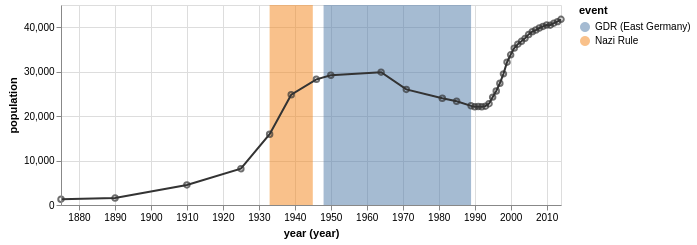

In [57]:
layerFalkensee =
    let desc = "The population of the German city of Falkensee over time"

        rw y p = dataRow [("year", Number y), ("population", Number p)]           
        dvals = dataFromRows [Parse [("year", FoDate "%Y")]]
                   . rw 1875 1309
                   . rw 1890 1558
                   . rw 1910 4512
                   . rw 1925 8180
                   . rw 1933 15915
                   . rw 1939 24824
                   . rw 1946 28275
                   . rw 1950 29189
                   . rw 1964 29881
                   . rw 1971 26007
                   . rw 1981 24029
                   . rw 1985 23340
                   . rw 1989 22307
                   . rw 1990 22087
                   . rw 1991 22139
                   . rw 1992 22105
                   . rw 1993 22242
                   . rw 1994 22801
                   . rw 1995 24273
                   . rw 1996 25640
                   . rw 1997 27393
                   . rw 1998 29505
                   . rw 1999 32124
                   . rw 2000 33791
                   . rw 2001 35297
                   . rw 2002 36179
                   . rw 2003 36829
                   . rw 2004 37493
                   . rw 2005 38376
                   . rw 2006 39008
                   . rw 2007 39366
                   . rw 2008 39821
                   . rw 2009 40179
                   . rw 2010 40511
                   . rw 2011 40465
                   . rw 2012 40905
                   . rw 2013 41258
                   . rw 2014 41777

        dvals1 = dataFromRows [Parse [("start", FoDate "%Y"), ("end", FoDate "%Y")]]
                    . dataRow [("start", Number 1933), ("end", Number 1945), ("event", Str "Nazi Rule")]
                    . dataRow [("start", Number 1948), ("end", Number 1989), ("event", Str "GDR (East Germany)")]
                 
        enc1 = encoding
                  . position X [PName "start", PmType Temporal, PTimeUnit Year, PAxis []]
                  . position X2 [PName "end", PmType Temporal, PTimeUnit Year]
                  . color [MName "event", MmType Nominal]
                  . opacity [MNumber 0.5] -- added just to check            
        enc2 = encoding
                  . position X [PName "year", PmType Temporal, PTimeUnit Year]
                  . position Y [PName "population", PmType Quantitative]
                  . color [MString "#333"]
      
        lyr1 = asSpec [mark Rect [], dvals1 [], enc1 []]
        lyr2 = asSpec [mark Line [], enc2 []]
        lyr3 = asSpec [mark Point [], enc2 []]


    in toVegaLite [description desc, width 500, dvals [], layer [lyr1, lyr2, lyr3]]

vlShow layerFalkensee

Return to the [Table of Contents](#Table-of-Contents).

## Ranged Dot Plot

From https://vega.github.io/vega-lite/examples/layer_ranged_dot.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A ranged dot plot that uses 'layer' to convey changing life expectancy for the five most populous countries (between 1955 and 2000).",
  "data": {"url": "data/countries.json"},
  "transform": [
    {
      "filter": {
        "field": "country",
        "oneOf": ["China", "India", "United States", "Indonesia", "Brazil"]
      }
    },
    {
      "filter": {
        "field": "year",
        "oneOf": [1955, 2000]
      }
    }
  ],
  "encoding": {
    "x": {
      "field": "life_expect",
      "type": "quantitative",
      "axis": {
        "title": "Life Expectancy (years)"
      }
    },
    "y": {
      "field": "country",
      "type": "nominal",
      "axis": {
        "title": "Country",
        "offset": 5,
        "ticks": false,
        "minExtent": 70,
        "domain": false
      }
    }
  },
  "layer": [
    {
      "mark": "line",
      "encoding": {
        "detail": {
          "field": "country",
          "type": "nominal"
        },
        "color": {"value": "#db646f"}
      }
    },
    {
      "mark": {
        "type": "point",
        "filled": true
      },
      "encoding": {
        "color": {
          "field": "year",
          "type": "ordinal",
          "scale": {
            "domain": [1955, 2000],
            "range": ["#e6959c", "#911a24"]
          },
          "legend": {
            "title": "Year"
          }
        },
        "size": {"value": 100},
        "opacity": {"value": 1}
      }
    }
  ]
}
```

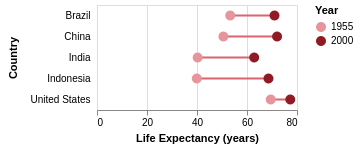

In [58]:
layerRangedDot =
    let desc = "A ranged dot plot that uses 'layer' to convey changing life expectancy for the five most populous countries (between 1955 and 2000)."

        -- dvals = dataFromUrl "data/countries.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/countries.json"
           
        cnames = ["China", "India", "United States", "Indonesia", "Brazil"]
        trans = transform
                   . filter (FOneOf "country" (Strings cnames))
                   . filter (FOneOf "year" (Numbers [1955, 2000]))
           
        enc = encoding
                 . position X [PName "life_expect", PmType Quantitative, PAxis [AxTitle "Life Expectancy (years)"]]
                 . position Y [ PName "country", PmType Nominal
                              , PAxis [AxTitle "Country", AxOffset 5, AxTicks False, AxDomain False, AxMinExtent 70]
                              ]
        enc1 = encoding
                  . detail [DName "country", DmType Nominal]
                  . color [MString "#db646f"]
        enc2 = encoding
                  . color [MName "year", MmType Ordinal, MScale lscale, MLegend [LTitle "Year"]]
                  . size [MNumber 100]
                  . opacity [MNumber 1]
                  
        -- categoricalDomainMap has both domain and range as strings
        lscale = [SDomain (DNumbers [1955, 2000]), SRange (RStrings ["#e6959c", "#911a24"])]
           
        lyr1 = asSpec [mark Line [], enc1 []]
        lyr2 = asSpec [mark Point [MFilled True], enc2 []]
                 
    in toVegaLite [description desc, dvals [], trans [], enc [], layer [lyr1, lyr2]]

vlShow layerRangedDot

Return to the [Table of Contents](#Table-of-Contents).

## Layered Plot with Dual-Axis

From https://vega.github.io/vega-lite/examples/layer_bar_dual_axis.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/seattle-weather.csv"},
  "layer": [
    {
      "mark": "bar",
      "encoding": {
        "x": {
          "timeUnit": "month",
          "field": "date",
          "type": "ordinal"
        },
        "y": {
          "aggregate": "mean",
          "field": "precipitation",
          "type": "quantitative",
          "axis": {
            "grid": false
          }
        }
      }
    },
    {
      "mark": "line",
      "encoding": {
        "x": {
          "timeUnit": "month",
          "field": "date",
          "type": "ordinal"
        },
        "y": {
          "aggregate": "mean",
          "field": "temp_max",
          "type": "quantitative",
          "axis": {
            "grid": false
          },
          "scale": {"zero": false}
        },
        "color": {"value": "firebrick"}
      }
    }
  ],
  "resolve": {"scale": {"y": "independent"}}
}
```

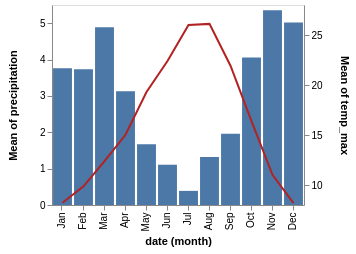

In [59]:
layerBarDualAxis =
    let -- dvals = dataFromUrl "data/seattle-weather.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/seattle-weather.csv"
           
        xpos = position X [PName "date", PmType Ordinal, PTimeUnit Month]
        enc1 = encoding
                  . xpos
                  . position Y [ PName "precipitation", PmType Quantitative
                               , PAggregate Mean, PAxis [AxGrid False]
                               ]
        enc2 = encoding
                  . xpos
                  . position Y [ PName "temp_max", PmType Quantitative
                               , PAggregate Mean, PAxis [AxGrid False], PScale [SZero False]
                               ]
                  . color [MString "firebrick"]
           
        lyr1 = asSpec [mark Bar [], enc1 []]
        lyr2 = asSpec [mark Line [], enc2 []]
           
        rsv = resolve
                 . resolution (RScale [(ChY, Independent)])
           
    in toVegaLite [dvals [], layer [lyr1, lyr2], rsv []]
       
vlShow layerBarDualAxis

Return to the [Table of Contents](#Table-of-Contents).

## Horizon Graph

From https://vega.github.io/vega-lite/examples/area_horizon.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Horizon Graph with 2 layers. (See https://idl.cs.washington.edu/papers/horizon/ for more details on Horizon Graphs.)",
  "width": 300,
  "height": 50,
  "data": {
    "values": [
      {"x": 1,  "y": 28}, {"x": 2,  "y": 55},
      {"x": 3,  "y": 43}, {"x": 4,  "y": 91},
      {"x": 5,  "y": 81}, {"x": 6,  "y": 53},
      {"x": 7,  "y": 19}, {"x": 8,  "y": 87},
      {"x": 9,  "y": 52}, {"x": 10, "y": 48},
      {"x": 11, "y": 24}, {"x": 12, "y": 49},
      {"x": 13, "y": 87}, {"x": 14, "y": 66},
      {"x": 15, "y": 17}, {"x": 16, "y": 27},
      {"x": 17, "y": 68}, {"x": 18, "y": 16},
      {"x": 19, "y": 49}, {"x": 20, "y": 15}
    ]
  },
  "layer": [{
    "mark": {"type": "area", "clip": true, "orient": "vertical"},
    "encoding": {
      "x": {
        "field": "x", "type": "quantitative",
        "scale": {"zero": false, "nice": false}
      },
      "y": {
        "field": "y", "type": "quantitative",
        "scale": {"domain": [0,50]}
      },
      "opacity": {"value": 0.6}
    }
  }, {
    "transform": [
      {
        "calculate": "datum.y - 50",
        "as": "ny"
      }
    ],
    "mark": {"type": "area", "clip": true, "orient": "vertical"},
    "encoding": {
      "x": {
        "field": "x", "type": "quantitative"
      },
      "y": {
        "field": "ny", "type": "quantitative",
        "scale": {"domain": [0,50]},
        "axis": {"title": "y"}
      },
      "opacity": {"value": 0.3}
    }
  }],
  "config": {
    "area": {"interpolate": "monotone"}
  }
}
```

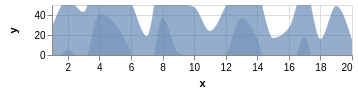

In [ ]:
areaHorizon =
    let desc = "Horizon Graph with 2 layers. (See https://idl.cs.washington.edu/papers/horizon/ for more details on Horizon Graphs.)"

        dvals = dataFromColumns []
                   . dataColumn "x" (Numbers [1..20])
                   . dataColumn "y" (Numbers [ 28, 55, 43, 91, 81, 53, 19, 87, 52, 48
                                             , 24, 49, 87, 66, 17, 27, 68, 16, 49, 15
                                             ])

        enc1 = encoding
                  . position X [PName "x", PmType Quantitative, PScale [SZero False, SNice (IsNice False)]]
                  . position Y [PName "y", PmType Quantitative, PScale [SDomain (DNumbers [0, 50])]]
                  . opacity [MNumber 0.6]
        enc2 = encoding
                  . position X [PName "x", PmType Quantitative]
                  . position Y [PName "ny", PmType Quantitative, PScale [SDomain (DNumbers [0, 50])], PAxis [AxTitle "y"]]
                  . opacity [MNumber 0.3]
           
        marea = mark Area [MClip True, MOrient Vertical]

        trans2 = transform
                    . calculateAs "datum.y - 50" "ny" 
                    
        lyr1 = asSpec [marea, enc1 []]
        lyr2 = asSpec [trans2 [], marea, enc2 []]
           
        conf = configure
                  . configuration (AreaStyle [MInterpolate Monotone])
                  
    in toVegaLite [description desc, width 300, height 50, dvals [], layer [lyr1, lyr2], conf []]
       
vlShow areaHorizon

Return to the [Table of Contents](#Table-of-Contents).

## Connected Scatterplot (Lines with Custom Paths)

From https://vega.github.io/vega-lite/examples/layer_connected_scatterplot.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/driving.json"},
  "encoding": {
    "x": {
      "field": "miles", "type": "quantitative",
      "scale": {"zero": false}
    },
    "y": {
      "field": "gas", "type": "quantitative",
      "scale": {"zero": false}
    }
  },
  "layer": [{
    "mark": "line",
    "encoding": {
      "order": {"field": "year","type": "temporal"}
    }
  }, {
    "mark": {"type": "point", "filled": true}
  }]
}
```

In [ ]:
layerConnectedScatterplot =
    let -- dvals = dataFromUrl "data/driving.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/driving.json"
           
        enc = encoding
                 . position X [PName "miles", PmType Quantitative, PScale [SZero False]]
                 . position Y [PName "gas", PmType Quantitative, PScale [SZero False]]

        enc1 = encoding
                  . order [OName "year", OmType Temporal] 
                  
        lyr1 = asSpec [mark Line [], enc1 []]
        lyr2 = asSpec [mark Point [MFilled True]]
           
    in toVegaLite [dvals [], enc [], layer [lyr1, lyr2]]
       
vlShow layerConnectedScatterplot

Return to the [Table of Contents](#Table-of-Contents).

## Carbon Dioxide in the Atmosphere

From https://vega.github.io/vega-lite/examples/layer_line_co2_concentration.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {
    "url": "data/co2-concentration.csv",
    "format": {
      "parse": {"Date": "utc:'%Y-%m-%d'"}
    }
  },
  "width": 800,
  "height": 500,
  "transform": [
    {
      "calculate": "year(datum.Date)",
      "as": "year"
    },
    {
      "calculate": "month(datum.Date)",
      "as": "month"
    },
    {
      "calculate": "floor(datum.year / 10) + 'x'",
      "as": "decade"
    },
    {
      "calculate": "(datum.year % 10) + (datum.month/12)",
      "as": "scaled_date"
    }
  ],
  "layer": [
    {
      "mark": "line",
      "encoding": {
        "x": {
          "field": "scaled_date",
          "type": "quantitative",
          "axis": {
            "title": "Year into Decade",
            "tickCount": 11
          }
        },
        "y": {
          "field": "CO2",
          "axis": {
            "title": "CO2 concentration in ppm"
          },
          "type": "quantitative",
          "scale": {
            "zero": false
          }
        },
        "detail": {
          "field": "decade",
          "type": "ordinal"
        },
        "color": {
          "field": "decade",
          "type": "nominal",
          "legend": {
            "offset": 40
          }
        }
      }
    },
    {
      "mark": {
        "type": "text",
        "align": "left",
        "baseline": "top",
        "dx": 3,
        "dy": 1
      },
      "transform": [
        {
          "aggregate": [{
            "op": "argmin",
            "field": "scaled_date",
            "as": "aggregated"
          }],
          "groupby": ["decade"]
        },
        {
          "calculate": "datum.aggregated.scaled_date",
          "as": "scaled_date"
        },
        {
          "calculate": "datum.aggregated.CO2",
          "as": "CO2"
        }
      ],
      "encoding": {
        "x": {
          "field": "scaled_date",
          "type": "quantitative"
        },
        "y": {
          "field": "CO2",
          "type": "quantitative"
        },
        "text": {
          "field": "aggregated.year",
          "type": "nominal"
        }
      }
    },
    {
      "mark": {
        "type": "text",
        "align": "left",
        "baseline": "bottom",
        "dx": 3,
        "dy": 1
      },
      "transform": [
        {
          "aggregate": [{
            "op": "argmax",
            "field": "scaled_date",
            "as": "aggregated"
          }],
          "groupby": ["decade"]
        },
        {
          "calculate": "datum.aggregated.scaled_date",
          "as": "scaled_date"
        },
        {
          "calculate": "datum.aggregated.CO2",
          "as": "CO2"
        }
      ],
      "encoding": {
        "x": {
          "field": "scaled_date",
          "type": "quantitative"
        },
        "y": {
          "field": "CO2",
          "type": "quantitative"
        },
        "text": {
          "field": "aggregated.year",
          "type": "nominal"
        }
      }
    }
  ]
}
```

## WARNING

There appears to be a problem with the rendering of this visualization, as the Jupyter Lab
output has the labels displayed as `undefined` - which suggests a JavaScript error - but
if you view the Vega-Lite representation in the Vega-Lite editor then they are
displayed as the year value (but appear twice, at the start of the decade, rather than
one being at the start and one at the end).

I may have made a mistake in the conversion below, or there could be some changes in the
Vega-Lite schema (2 versus 3), or a combination of both.

In [ ]:
layerLineCO2 =
    let -- dvals = dataFromUrl "data/co2-concentration.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/co2-concentration.csv"
                   [Parse [("Date", FoUtc "%Y-%m-%d")]]
                   
        trans = transform
                   . calculateAs "year(datum.Date)" "year"
                   . calculateAs "month(datum.Date)" "month"
                   . calculateAs "floor(datum.year / 10) + 'x'" "decade"
                   . calculateAs "(datum.year % 10) + (datum.month/12)" "scaled_date"

        posSDate = position X [ PName "scaled_date", PmType Quantitative
                                 , PAxis [AxTitle "Year into Decade", AxTickCount 11]
                                 ]
        posCO2 = position Y [ PName "CO2", PmType Quantitative, PScale [SZero False]
                               , PAxis [AxTitle "CO2 concentration in ppm"]
                               ]        
        enc1 = encoding
                  . posSDate
                  . posCO2
                  . detail [DName "decade", DmType Ordinal]
                  . color [MName "decade", MmType Nominal, MLegend [LOffset 40]]
                  
        topts bl = [MAlign AlignLeft, MBaseline bl, MdX 3, MdY 1]
           
        trans2 ty = transform
                      . aggregate [opAs ty "scaled_date" "aggregated"] ["decade"]
                      . calculateAs "datum.aggregated.scaled_date" "scaled_date"
                      . calculateAs "datum.aggregated.CO2" "CO2"

        enc2 = encoding
                  . position X [PName "scaled_date", PmType Quantitative]
                  . position Y [PName "CO2", PmType Quantitative]
                  . text [TName "aggregated.year", TmType Nominal]

        enc3 = enc2
                  
        lyr1 = [mark Line [], enc1 []]
        lyr2 = [mark Text (topts AlignTop), trans2 ArgMin [], enc2 []]
        lyr3 = [mark Text (topts AlignBottom), trans2 ArgMax [], enc3 []]
        lyrs = map asSpec [lyr1, lyr2, lyr3]
    
    in toVegaLite [dvals, width 800, height 500, trans [], layer lyrs]

vlShow layerLineCO2

Return to the [Table of Contents](#Table-of-Contents).

# Composition

 - [Repeat and layer to show different weather measures](#Repeat-and-layer-to-show-different-weather-measures)
 - [Vertically concatenated charts that show precipitation in Seattle](#Vertically-concatenated-charts-that-show-precipitation-in-Seattle)
 - [Horizontally repeated charts](#Horizontally-repeated-charts)


## Repeat and layer to show different weather measures


From https://vega.github.io/vega-lite/examples/repeat_layer.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Summarized and per year weather information for Seatle and New York.",
  "data": {"url": "data/weather.csv"},
  "repeat": {"column": ["temp_max","precipitation","wind"]},
  "spec": {
    "layer": [
      {
        "mark": "line",
        "encoding": {
          "y": {
            "aggregate": "mean",
            "field": {"repeat": "column"},
            "type": "quantitative"
          },
          "x": {
            "timeUnit": "month",
            "field": "date",
            "type": "ordinal"
          },
          "detail": {
            "timeUnit": "year",
            "type": "temporal",
            "field": "date"
          },
          "color": {"type": "nominal","field": "location"},
          "opacity": {"value": 0.2}
        }
      },
      {
        "mark": "line",
        "encoding": {
          "y": {
            "aggregate": "mean",
            "field": {"repeat": "column"},
            "type": "quantitative"
          },
          "x": {
            "timeUnit": "month",
            "field": "date",
            "type": "ordinal"
          },
          "color": {"type": "nominal","field": "location"}
        }
      }
    ]
  }
}
```

In [ ]:
repeatLayer =
    let -- dvals = dataFromUrl "data/weather.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/weather.csv"
        desc = "Summarized and per year weather information for Seatle and New York."
           
        rp = repeat [ColumnFields ["temp_max", "precipitation", "wind"]]

        sp = specification (asSpec [layer [lyr1, lyr2]])

        lyr1 = asSpec [mark Line [], enc1 []]
        lyr2 = asSpec [mark Line [], enc2 []]

        enc1 = encoding
                  . position Y [PAggregate Mean, PmType Quantitative, PRepeat Column]
                  . position X [PName "date", PmType Ordinal, PTimeUnit Month]
                  . detail [DName "date", DmType Temporal, DTimeUnit Year]
                  . color [MName "location", MmType Nominal]
                  . opacity [MNumber 0.2]

        enc2 = encoding
                  . position Y [PAggregate Mean, PmType Quantitative, PRepeat Column]
                  . position X [PName "date", PmType Ordinal, PTimeUnit Month]
                  . color [MName "location", MmType Nominal]
                 
    in toVegaLite [description desc, dvals [], rp, sp]
       
vlShow repeatLayer

Return to the [Table of Contents](#Table-of-Contents).

## Vertically concatenated charts that show precipitation in Seattle

From https://vega.github.io/vega-lite/examples/vconcat_weather.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Two vertically concatenated charts that show a histogram of precipitation in Seattle and the relationship between min and max temperature.",
  "data": {
    "url": "data/weather.csv"
  },
  "transform": [{
    "filter": "datum.location === 'Seattle'"
  }],
  "vconcat": [
    {
      "mark": "bar",
      "encoding": {
        "x": {
          "timeUnit": "month",
          "field": "date",
          "type": "ordinal"
        },
        "y": {
          "aggregate": "mean",
          "field": "precipitation",
          "type": "quantitative"
        }
      }
    },
    {
      "mark": "point",
      "encoding": {
        "x": {
          "field": "temp_min",
          "type": "quantitative",
          "bin": true
        },
        "y": {
          "field": "temp_max",
          "type": "quantitative",
          "bin": true
        },
        "size": {
          "aggregate": "count",
          "type": "quantitative"
        }
      }
    }
  ]
}
```

In [ ]:
vconcatWeather =
    let desc = "Two vertically concatenated charts that show a histogram of precipitation in Seattle and the relationship between min and max temperature."

        -- dvals = dataFromUrl "data/weather.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/weather.csv"
           
        trans = transform
                   . filter (FExpr "datum.location === 'Seattle'")
           
        enc1 = encoding
                  . position Y [PName "precipitation", PAggregate Mean, PmType Quantitative]
                  . position X [PName "date", PmType Ordinal, PTimeUnit Month]
        enc2 = encoding
                  . position Y [PName "temp_max", PmType Quantitative, PBin []]
                  . position X [PName "temp_min", PmType Quantitative, PBin []]
                  . size [MAggregate Count, MmType Quantitative]
                 
        plot1 = asSpec [mark Bar [], enc1 []]
        plot2 = asSpec [mark Point [], enc2 []]
           
    in toVegaLite [description desc, dvals [], trans [], vConcat [plot1, plot2]]
       
vlShow vconcatWeather

Return to the [Table of Contents](#Table-of-Contents).

## Horizontally repeated charts

From https://vega.github.io/vega-lite/examples/repeat_histogram.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "repeat": {"column": ["Horsepower","Miles_per_Gallon", "Acceleration"]},
  "spec": {
    "data": {"url": "data/cars.json"},
    "mark": "bar",
    "encoding": {
      "x": {
        "field": {"repeat": "column"},
        "bin": true,
        "type": "quantitative"
      },
      "y": {"aggregate": "count","type": "quantitative"},
      "color": {"field": "Origin","type": "nominal"}
    }
  }
}
```

In [ ]:
repeatHistogram =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
           
        fields = [ColumnFields ["Horsepower", "Miles_per_Gallon", "Acceleration"]]

        sp = asSpec [ dvals []
                    , mark Bar []
                    , enc []
                    ]

        enc = encoding
                 . position X [PRepeat Column, PmType Quantitative, PBin []]
                 . position Y [PAggregate Count, PmType Quantitative]
                 . color [MName "Origin", MmType Nominal]

    in toVegaLite [repeat fields, specification sp]
       
vlShow repeatHistogram

Return to the [Table of Contents](#Table-of-Contents).

# Geographical (Maps)

 - [Choropleth of unemployment rate per county](#Choropleth-of-unemployment-rate-per-county)
 - [One dot per zipcode in the U.S.](#One-dot-per-zipcode-in-the-U.S.)
 - [One dot per airport in the US overlayed on geoshape](#One-dot-per-airport-in-the-US-overlayed-on-geoshape)
 - [Rules (line segments) connecting SEA to every airport reachable via direct flight](#Rules-%28line-segments%29-connecting-SEA-to-every-airport-reachable-via-direct-flight)
 - [Three choropleths representing disjoint data from the same table](#Three-choropleths-representing-disjoint-data-from-the-same-table)
 - [U.S. state capitals overlayed on a map of the U.S.](#U.S.-state-capitals-overlayed-on-a-map-of-the-U.S.)
 - [Line drawn between airports in the U.S. simulating a flight itinerary](#Line-drawn-between-airports-in-the-U.S.-simulating-a-flight-itinerary)
 - [Income in the U.S. by state, faceted over income brackets](#Income-in-the-U.S.-by-state,-faceted-over-income-brackets)
 - [London Tube Lines](#London-Tube-Lines)


# Choropleth of unemployment rate per county


From https://vega.github.io/vega-lite/examples/geo_choropleth.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.1.json",
  "width": 500,
  "height": 300,
  "data": {
    "url": "data/us-10m.json",
    "format": {
      "type": "topojson",
      "feature": "counties"
    }
  },
  "transform": [{
    "lookup": "id",
    "from": {
      "data": {
        "url": "data/unemployment.tsv"
      },
      "key": "id",
      "fields": ["rate"]
    }
  }],
  "projection": {
    "type": "albersUsa"
  },
  "mark": "geoshape",
  "encoding": {
    "color": {
      "field": "rate",
      "type": "quantitative"
    }
  }
}
```

In [ ]:
geoChoropleth =
    let -- dvals = dataFromUrl "data/us-10m.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/us-10m.json"
                   [TopojsonFeature "counties"]
           
        trans = transform
                   . lookup "id"
                            (dataFromUrl "https://vega.github.io/vega-datasets/data/unemployment.tsv" [])
                            "id"
                            ["rate"]
                            
        proj = projection [PType AlbersUsa]
        enc = encoding
                 . color [MName "rate", MmType Quantitative]
                 
    in toVegaLite [ width 500, height 300, dvals
                  , trans [], proj, mark Geoshape [], enc []]
       
vlShow geoChoropleth

Return to the [Table of Contents](#Table-of-Contents).

## One dot per zipcode in the U.S.

From https://vega.github.io/vega-lite/examples/geo_circle.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.1.json",
  "width": 500,
  "height": 300,
  "data": {
    "url": "data/zipcodes.csv"
  },
  "transform": [{"calculate": "substring(datum.zip_code, 0, 1)", "as": "digit"}],
  "projection": {
    "type": "albersUsa"
  },
  "mark": "circle",
  "encoding": {
    "longitude": {
      "field": "longitude",
      "type": "quantitative"
    },
    "latitude": {
      "field": "latitude",
      "type": "quantitative"
    },
    "size": {"value": 1},
    "color": {"field": "digit", "type": "nominal"}
  }
}
```

In [ ]:
geoCircle =
    let -- dvals = dataFromUrl "data/zipcodes.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/zipcodes.csv"
           
        trans = transform
                   . calculateAs "substring(datum.zip_code, 0, 1)" "digit"
                            
        proj = projection [PType AlbersUsa]
        enc = encoding
                 . position Longitude [PName "longitude", PmType Quantitative]
                 . position Latitude [PName "latitude", PmType Quantitative]
                 . size [MNumber 1]
                 . color [MName "digit", MmType Nominal]
                 
    in toVegaLite [ width 500, height 300, dvals []
                  , trans [], proj, mark Circle [], enc []]
       
vlShow geoCircle

Return to the [Table of Contents](#Table-of-Contents).

## One dot per airport in the US overlayed on geoshape

From https://vega.github.io/vega-lite/examples/geo_layer.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.1.json",
  "width": 500,
  "height": 300,
  "layer": [
    {
      "data": {
        "url": "data/us-10m.json",
        "format": {
          "type": "topojson",
          "feature": "states"
        }
      },
      "projection": {
        "type": "albersUsa"
      },
      "mark": {
        "type": "geoshape",
        "fill": "lightgray",
        "stroke": "white"
      }
    },
    {
      "data": {
        "url": "data/airports.csv"
      },
      "projection": {
        "type": "albersUsa"
      },
      "mark": "circle",
      "encoding": {
        "longitude": {
          "field": "longitude",
          "type": "quantitative"
        },
        "latitude": {
          "field": "latitude",
          "type": "quantitative"
        },
        "size": {"value": 10},
        "color": {"value": "steelblue"}
      }
    }
  ]
}
```

In [ ]:
geoLayer =
    let -- dvals1 = dataFromUrl "data/us-10m.json"
        dvals1 = dataFromUrl "https://vega.github.io/vega-datasets/data/us-10m.json"
                    [TopojsonFeature "states"]
                    
        -- dvals2 = dataFromUrl "data/airports.csv"
        dvals2 = dataFromUrl "https://vega.github.io/vega-datasets/data/airports.csv"
                            
        proj = projection [PType AlbersUsa]
        enc = encoding
                 . position Longitude [PName "longitude", PmType Quantitative]
                 . position Latitude [PName "latitude", PmType Quantitative]
                 . size [MNumber 10]
                 . color [MString "steelblue"]
               
        lyr1 = asSpec [dvals1, proj, mark Geoshape [MFill "lightgray", MStroke "white"]]
        lyr2 = asSpec [dvals2 [], proj, mark Circle [], enc []]
           
    in toVegaLite [width 500, height 300, layer [lyr1, lyr2]]

vlShow geoLayer

Return to the [Table of Contents](#Table-of-Contents).

## Rules (line segments) connecting SEA to every airport reachable via direct flight

From https://vega.github.io/vega-lite/examples/geo_rule.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.1.json",
  "width": 800,
  "height": 500,
  "layer": [
    {
      "data": {
        "url": "data/us-10m.json",
        "format": {
          "type": "topojson",
          "feature": "states"
        }
      },
      "projection": {
        "type": "albersUsa"
      },
      "mark": {
        "type": "geoshape",
        "fill": "lightgray",
        "stroke": "white"
      }
    },
    {
      "data": {
        "url": "data/airports.csv"
      },
      "projection": {
        "type": "albersUsa"
      },
      "mark": "circle",
      "encoding": {
        "longitude": {
          "field": "longitude",
          "type": "quantitative"
        },
        "latitude": {
          "field": "latitude",
          "type": "quantitative"
        },
        "size": {"value": 5},
        "color": {"value": "gray"}
      }
    },
    {
      "data": {
        "url": "data/flights-airport.csv"
      },
      "transform": [
        {"filter": {"field": "origin", "equal": "SEA"}},
        {
          "lookup": "origin",
          "from": {
            "data": {
              "url": "data/airports.csv"
            },
            "key": "iata",
            "fields": ["latitude", "longitude"]
          },
          "as": ["origin_latitude", "origin_longitude"]
        },
        {
          "lookup": "destination",
          "from": {
            "data": {
              "url": "data/airports.csv"
            },
            "key": "iata",
            "fields": ["latitude", "longitude"]
          },
          "as": ["dest_latitude", "dest_longitude"]
        }
      ],
      "projection": {
        "type": "albersUsa"
      },
      "mark": "rule",
      "encoding": {
        "longitude": {
          "field": "origin_longitude",
          "type": "quantitative"
        },
        "latitude": {
          "field": "origin_latitude",
          "type": "quantitative"
        },
        "longitude2": {
          "field": "dest_longitude",
          "type": "quantitative"
        },
        "latitude2": {
          "field": "dest_latitude",
          "type": "quantitative"
        }
      }
    }
  ]
}
```

In [ ]:
geoRule =
    let -- dvals1 = dataFromUrl "data/us-10m.json"
        dvals1 = dataFromUrl "https://vega.github.io/vega-datasets/data/us-10m.json"
                    [TopojsonFeature "states"]
                    
        -- dvals2 = dataFromUrl "data/airports.csv"
        dvals2 = dataFromUrl "https://vega.github.io/vega-datasets/data/airports.csv"
                    []
        
        -- dvals3 = dataFromUrl "data/flights-airport.csv"
        dvals3 = dataFromUrl "https://vega.github.io/vega-datasets/data/flights-airport.csv"
                    []
                                                        
        proj = projection [PType AlbersUsa]
        enc2 = encoding
                  . position Longitude [PName "longitude", PmType Quantitative]
                  . position Latitude [PName "latitude", PmType Quantitative]
                  . size [MNumber 5]
                  . color [MString "gray"]
        enc3 = encoding
                  . position Longitude [PName "origin_longitude", PmType Quantitative]
                  . position Latitude [PName "origin_latitude", PmType Quantitative]
                  . position Longitude2 [PName "dest_longitude", PmType Quantitative]
                  . position Latitude2 [PName "dest_latitude", PmType Quantitative]
               
        trans = transform
                   . filter (FEqual "origin" (Str "SEA"))
                   . lookup "origin" dvals2 "iata" ["latitude", "longitude"]
                   . calculateAs "datum.latitude" "origin_latitude"
                   . calculateAs "datum.longitude" "origin_longitude"
                   . lookup "destination" dvals2 "iata" ["latitude", "longitude"]
                   . calculateAs "datum.latitude" "dest_latitude"
                   . calculateAs "datum.longitude" "dest_longitude"

        lyr1 = asSpec [dvals1, proj, mark Geoshape [MFill "lightgray", MStroke "white"]]
        lyr2 = asSpec [dvals2, proj, mark Circle [], enc2 []]
        lyr3 = asSpec [dvals3, trans [], proj, mark Rule [], enc3 []]
           
    in toVegaLite [width 800, height 500, layer [lyr1, lyr2, lyr3]]

vlShow geoRule

Return to the [Table of Contents](#Table-of-Contents).

## Three choropleths representing disjoint data from the same table

From https://vega.github.io/vega-lite/examples/geo_repeat.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.1.json",
  "description": "the population per state, engineers per state, and hurricanes per state",
  "repeat": {"row": ["population", "engineers", "hurricanes"]},
  "resolve": {
    "scale": {
      "color": "independent"
    }
  },
  "spec": {
    "width": 500,
    "height": 300,
    "data": {
      "url": "data/population_engineers_hurricanes.csv"
    },
    "transform": [
      {
        "lookup": "id",
        "from": {
          "data": {
            "url": "data/us-10m.json",
            "format": {
              "type": "topojson",
              "feature": "states"
            }
          },
          "key": "id"
        },
        "as": "geo"
      }
    ],
    "projection": {"type": "albersUsa"},
    "mark": "geoshape",
    "encoding": {
      "shape": {
        "field": "geo",
        "type": "geojson"
      },
      "color": {
        "field": {"repeat": "row"},
        "type": "quantitative"
      }
    }
  }
}
```

In [ ]:
geoRepeat =
    let desc = "the population per state, engineers per state, and hurricanes per state"

        -- dvals1 = dataFromUrl "data/population_engineers_hurricanes.csv"
        dvals1 = dataFromUrl "https://vega.github.io/vega-datasets/data/population_engineers_hurricanes.csv"
                    []
                    
        -- dvals2 = dataFromUrl "data/us-10m.json"
        dvals2 = dataFromUrl "https://vega.github.io/vega-datasets/data/us-10m.json"
                    [TopojsonFeature "states"]
                                                    
        rp = [RowFields ["population", "engineers", "hurricanes"]]
        rsv = resolve
                 . resolution (RScale [(ChColor, Independent)])
           
        proj = projection [PType AlbersUsa]
        enc = encoding
                 . shape [MName "geo", MmType GeoFeature]
                 . color [MRepeat Row, MmType Quantitative]
               
        trans = transform
                   . lookupAs "id" dvals2 "id" "geo"

        sp = asSpec [ width 500, height 300
                    , dvals1
                    , trans []
                    , proj
                    , mark Geoshape []
                    , enc []
                    ]
    in toVegaLite [description desc, repeat rp, rsv [], specification sp]

vlShow geoRepeat

Return to the [Table of Contents](#Table-of-Contents).

## U.S. state capitals overlayed on a map of the U.S.

From https://vega.github.io/vega-lite/examples/geo_text.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.1.json",
  "width": 800,
  "height": 500,
  "projection": {
    "type": "albersUsa"
  },
  "layer": [
    {
      "data": {
        "url": "data/us-10m.json",
        "format": {
          "type": "topojson",
          "feature": "states"
        }
      },
      "mark": {
        "type": "geoshape",
        "fill": "lightgray",
        "stroke": "white"
      }
    },
    {
      "data": {
        "url": "data/us-state-capitals.json"
      },
      "encoding": {
        "longitude": {
          "field": "lon",
          "type": "quantitative"
        },
        "latitude": {
          "field": "lat",
          "type": "quantitative"
        }
      },
      "layer": [{
        "mark": {
          "type": "circle",
          "color": "orange"
        }
      }, {
        "mark": {
          "type": "text",
          "dy": -6
        },
        "encoding": {
          "text": {"field": "city", "type": "nominal"}
        }
      }]
    }
  ]
}
```

In [ ]:
geoText =
    let -- dvals1 = dataFromUrl "data/us-10m.json"
        dvals1 = dataFromUrl "https://vega.github.io/vega-datasets/data/us-10m.json"
                    [TopojsonFeature "states"]
                    
        -- dvals2 = dataFromUrl "data/airports.csv"
        dvals2 = dataFromUrl "https://vega.github.io/vega-datasets/data/us-state-capitals.json"
                    []
                    
        proj = projection [PType AlbersUsa]
        enc2 = encoding
                  . position Longitude [PName "lon", PmType Quantitative]
                  . position Latitude [PName "lat", PmType Quantitative]    
        enc22 = encoding
                   . text [TName "city", TmType Nominal]
           
        lyr21 = asSpec [mark Circle [MColor "orange"]]
        lyr22 = asSpec [mark Text [MdY (-6)], enc22 []]
           
        lyr1 = asSpec [dvals1, mark Geoshape [MFill "lightgray", MStroke "white"]]
        lyr2 = asSpec [dvals2, enc2 [], layer [lyr21, lyr22]]
           
    in toVegaLite [width 800, height 500, proj, layer [lyr1, lyr2]]

vlShow geoText

Return to the [Table of Contents](#Table-of-Contents).

## Line drawn between airports in the U.S. simulating a flight itinerary

From https://vega.github.io/vega-lite/examples/geo_line.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Line drawn between airports in the U.S. simulating a flight itinerary",
  "width": 800,
  "height": 500,
  "layer": [
    {
      "data": {
        "url": "data/us-10m.json",
        "format": {
          "type": "topojson",
          "feature": "states"
        }
      },
      "projection": {
        "type": "albersUsa"
      },
      "mark": {
        "type": "geoshape",
        "fill": "#eee",
        "stroke": "white"
      }
    },
    {
      "data": {
        "url": "data/airports.csv"
      },
      "projection": {
        "type": "albersUsa"
      },
      "mark": "circle",
      "encoding": {
        "longitude": {
          "field": "longitude",
          "type": "quantitative"
        },
        "latitude": {
          "field": "latitude",
          "type": "quantitative"
        },
        "size": {
          "value": 5
        },
        "color": {
          "value": "gray"
        }
      }
    },
    {
      "data": {
        "values": [
          {"airport": "SEA", "order": 1},
          {"airport": "SFO", "order": 2},
          {"airport": "LAX", "order": 3},
          {"airport": "LAS", "order": 4},
          {"airport": "DFW", "order": 5},
          {"airport": "DEN", "order": 6},
          {"airport": "ORD", "order": 7},
          {"airport": "JFK", "order": 8}
        ]
      },
      "transform": [
        {
          "lookup": "airport",
          "from": {
            "data": {
              "url": "data/airports.csv"
            },
            "key": "iata",
            "fields": [
              "latitude",
              "longitude"
            ]
          }
        }
      ],
      "projection": {
        "type": "albersUsa"
      },
      "mark": "line",
      "encoding": {
        "longitude": {
          "field": "longitude",
          "type": "quantitative"
        },
        "latitude": {
          "field": "latitude",
          "type": "quantitative"
        },
        "order": {
          "field": "order",
          "type": "ordinal"
        }
      }
    }
  ]
}
```

In [ ]:
geoLine =
    let desc = "Line drawn between airports in the U.S. simulating a flight itinerary"

        -- dvals1 = dataFromUrl "data/us-10m.json"
        dvals1 = dataFromUrl "https://vega.github.io/vega-datasets/data/us-10m.json"
                    [TopojsonFeature "states"]
                    
        -- dvals2 = dataFromUrl "data/airports.csv"
        dvals2 = dataFromUrl "https://vega.github.io/vega-datasets/data/airports.csv" []
        
        dvals3 = dataFromColumns []
                    . dataColumn "airport" (Strings ["SEA", "SFO", "LAX", "LAS", "DFW", "DEN", "ORD", "JFK"])
                    . dataColumn "order" (Numbers [1..8])
                                                        
        proj = projection [PType AlbersUsa]
        enc2 = encoding
                  . position Longitude [PName "longitude", PmType Quantitative]
                  . position Latitude [PName "latitude", PmType Quantitative]
                  . size [MNumber 5]
                  . color [MString "gray"]
        enc3 = encoding
                  . position Longitude [PName "longitude", PmType Quantitative]
                  . position Latitude [PName "latitude", PmType Quantitative]
                  . order [OName "order", OmType Ordinal]
               
        trans = transform
                   . lookup "airport" dvals2 "iata" ["latitude", "longitude"]

        lyr1 = asSpec [dvals1, proj, mark Geoshape [MFill "#eee", MStroke "white"]]
        lyr2 = asSpec [dvals2, proj, mark Circle [], enc2 []]
        lyr3 = asSpec [dvals3 [], trans [], proj, mark Line [], enc3 []]
           
    in toVegaLite [description desc, width 800, height 500, layer [lyr1, lyr2, lyr3]]

vlShow geoLine

Return to the [Table of Contents](#Table-of-Contents).

## Income in the U.S. by state, faceted over income brackets

From https://vega.github.io/vega-lite/examples/geo_trellis.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.1.json",
  "width": 500,
  "height": 300,
  "data": {
    "url": "data/income.json"
  },
  "transform": [
    {
      "lookup": "id",
      "from": {
        "data": {
          "url": "data/us-10m.json",
          "format": {
            "type": "topojson",
            "feature": "states"
          }
        },
        "key": "id"
      },
      "as": "geo"
    }
  ],
  "projection": {"type": "albersUsa"},
  "mark": "geoshape",
  "encoding": {
    "shape": {"field": "geo","type": "geojson"},
    "color": {"field": "pct","type": "quantitative"},
    "row": {"field": "group","type": "nominal"}
  }
}
```

In [ ]:
geoTrellis =
    let -- dvals1 = dataFromUrl "data/income.json"
        dvals1 = dataFromUrl "https://vega.github.io/vega-datasets/data/income.json"
                    []
                    
        -- dvals2 = dataFromUrl "data/us-10m.json"
        dvals2 = dataFromUrl "https://vega.github.io/vega-datasets/data/us-10m.json"
                    [TopojsonFeature "states"]
                                                    
        proj = projection [PType AlbersUsa]
        enc = encoding
                 . shape [MName "geo", MmType GeoFeature]
                 . color [MName "pct", MmType Quantitative]
                 . row [FName "group", FmType Nominal]
               
        trans = transform
                   . lookupAs "id" dvals2 "id" "geo"

    in toVegaLite [width 500, height 300, dvals1, trans [], proj, mark Geoshape [], enc []]

vlShow geoTrellis

Return to the [Table of Contents](#Table-of-Contents).

## London Tube Lines

From https://vega.github.io/vega-lite/examples/geo_layer_line_london.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "width": 700,
  "height": 500,
  "config": {
    "view": {
      "stroke": "transparent"
    }
  },
  "layer": [
    {
      "data": {
        "url": "data/londonBoroughs.json",
        "format": {
          "type": "topojson",
          "feature": "boroughs"
        }
      },
      "mark": {
        "type": "geoshape",
        "stroke": "white",
        "strokeWidth": 2
      },
      "encoding": {
        "color": {
          "value": "#eee"
        }
      }
    },
    {
      "data": {
        "url": "data/londonCentroids.json",
        "format": {
          "type": "json"
        }
      },
      "transform": [
        {
          "calculate": "indexof (datum.name,' ') > 0  ? substring(datum.name,0,indexof(datum.name, ' ')) : datum.name",
          "as": "bLabel"
        }
      ],
      "mark": "text",
      "encoding": {
        "longitude": {
          "field": "cx",
          "type": "quantitative"
        },
        "latitude": {
          "field": "cy",
          "type": "quantitative"
        },
        "text": {
          "field": "bLabel",
          "type": "nominal"
        },
        "size": {
          "value": 8
        },
        "opacity": {
          "value": 0.6
        }
      }
    },
    {
      "data": {
        "url": "data/londonTubeLines.json",
        "format": {
          "type": "topojson",
          "feature": "line"
        }
      },
      "mark": {
        "type": "geoshape",
        "filled": false,
        "strokeWidth": 2
      },
      "encoding": {
        "color": {
          "field": "id",
          "type": "nominal",
          "legend": {
            "title": null,
            "orient": "bottom-right",
            "offset": 0
          },
          "scale": {
            "domain": [
              "Bakerloo",
              "Central",
              "Circle",
              "District",
              "DLR",
              "Hammersmith & City",
              "Jubilee",
              "Metropolitan",
              "Northern",
              "Piccadilly",
              "Victoria",
              "Waterloo & City"
            ],
            "range": [
              "rgb(137,78,36)",
              "rgb(220,36,30)",
              "rgb(255,206,0)",
              "rgb(1,114,41)",
              "rgb(0,175,173)",
              "rgb(215,153,175)",
              "rgb(106,114,120)",
              "rgb(114,17,84)",
              "rgb(0,0,0)",
              "rgb(0,24,168)",
              "rgb(0,160,226)",
              "rgb(106,187,170)"
            ]
          }
        }
      }
    }
  ]
}
```

In [ ]:
geoLayerLineLondon =
    let -- dvals1 = dataFromUrl "data/londonBoroughs.json"
        dvals1 = dataFromUrl "https://vega.github.io/vega-datasets/data/londonBoroughs.json"
                    [TopojsonFeature "boroughs"]
                    
        -- dvals2 = dataFromUrl "data/londonCentroids.json"
        dvals2 = dataFromUrl "https://vega.github.io/vega-datasets/data/londonCentroids.json"
                    [] -- how to get "format: {type: json}"? Do we need to?
                    
        -- dvals3 = dataFromUrl "data/londonBoroughs.json"
        dvals3 = dataFromUrl "https://vega.github.io/vega-datasets/data/londonTubeLines.json"
                    [TopojsonFeature "line"]
                    
        conf = configure
                  . configuration (View [Stroke (Just "transparent")])

        scmap = categoricalDomainMap [ ("Bakerloo", "rgb(137,78,36)")
                                     , ("Central", "rgb(220,36,30)")
                                     , ("Circle", "rgb(255,206,0)")
                                     , ("District", "rgb(1,114,41)")
                                     , ("DLR", "rgb(0,175,173)")
                                     , ("Hammersmith & City", "rgb(215,153,175)")
                                     , ("Jubilee", "rgb(106,114,120)")
                                     , ("Metropolitan", "rgb(114,17,84)")
                                     , ("Northern", "rgb(0,0,0)")
                                     , ("Piccadilly", "rgb(0,24,168)")
                                     , ("Victoria", "rgb(0,160,226)")
                                     , ("Waterloo & City", "rgb(106,187,170)")
                                     ]
                         
        enc1 = encoding (color [MString "#eee"] [])
        enc2 = encoding
                  . position Longitude [PName "cx", PmType Quantitative]
                  . position Latitude [PName "cy",PmType Quantitative]
                  . text [TName "bLabel", TmType Nominal]
                  . size [MNumber 8]
                  . opacity [MNumber 0.6]

        -- Version 0.2 of hvega renamed the LegendOrientation symbols so that they start
        -- with LO. In the LOrient argument below, BottomRight was therefore changed to
        -- LOBottomRight.
        --
        enc3 = encoding
                  . color [ MName "id", MmType Nominal
                          , MLegend [LTitle "", LOrient LOBottomRight, LOffset 0]
                          , MScale scmap
                          ]
                  
        trans2 = transform
                    . calculateAs "indexof (datum.name,' ') > 0  ? substring(datum.name,0,indexof(datum.name, ' ')) : datum.name"
                                  "bLabel"

        lyr1 = asSpec [dvals1, mark Geoshape [MStroke "white", MStrokeWidth 2], enc1]
        lyr2 = asSpec [dvals2, trans2 [], mark Text [], enc2 []]
        lyr3 = asSpec [dvals3, mark Geoshape [MFilled False, MStrokeWidth 2], enc3 []]
           
    in toVegaLite [width 700, height 500, conf [], layer [lyr1, lyr2, lyr3]]

vlShow geoLayerLineLondon

Return to the [Table of Contents](#Table-of-Contents).

# Interactive

 - [Rectangular Brush](#Rectangular-Brush)
 - [Paintbrush HIghlight](#Paintbrush-Highlight)
 - [Scatterplot Pan & Zoom](#Scatterplot-Pan-%26amp%3B-Zoom)
 - [Query Widgets](#Query-Widgets)
 - [Interactive Average](#Interactive-Average)
 - [Overview and Detail](#Overview-and-Detail)
 - [Crossfilter](#Crossfilter)
 - [Scatterplot Matrix](#Scatterplot-Matrix)
 - [Interactive Dashboard with Cross Highlight](#Interactive-Dashboard-with-Cross-Highlight)
 - [Multi Series Line Chart with Tooltips](#Multi-Series-Line-Chart-with-Tooltips)
 

## Rectangular Brush

From https://vega.github.io/vega-lite/examples/interactive_brush.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Drag out a rectangular brush to highlight points.",
  "data": {"url": "data/cars.json"},
  "selection": {
    "brush": {
      "type": "interval"
    }
  },
  "mark": "point",
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
    "color": {
      "condition": {"selection": "brush", "field": "Cylinders", "type": "ordinal"},
      "value": "grey"
    }
  }
}
```

In [ ]:
interactiveBrush =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
        desc = "Drag out a rectangular brush to highlight points."
           
        sel = selection
                 . select "brush" Interval []
                 
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative]
                 . position Y [PName "Miles_per_Gallon", PmType Quantitative]
                 . color [ MSelectionCondition (SelectionName "brush")
                           [MName "Cylinders", MmType Ordinal]
                           [MString "grey"]
                         ]

    in toVegaLite [description desc, dvals [], sel [], mark Point [], enc []]
       
vlShow interactiveBrush

Return to the [Table of Contents](#Table-of-Contents).

## Paintbrush Highlight

From https://vega.github.io/vega-lite/examples/interactive_paintbrush.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Select multiple points with the shift key.",
  "data": {"url": "data/cars.json"},
  "selection": {
    "paintbrush": {
      "type": "multi", "on": "mouseover",
      "nearest": true
    }
  },
  "mark": "point",
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
    "size": {
      "condition": {"selection": "paintbrush", "value": 300},
      "value": 50
    }
  }
}
```

In [ ]:
interactivePaintBrush =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
        desc = "Select multiple points with the shift key."
           
        sel = selection
                 . select "paintbrush" Multi [On "mouseover", Nearest True]
                 
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative]
                 . position Y [PName "Miles_per_Gallon", PmType Quantitative]
                 . size [ MSelectionCondition (SelectionName "paintbrush")
                          [MNumber 300]
                          [MNumber 50]
                        ]

    in toVegaLite [description desc, dvals [], sel [], mark Point [], enc []]
       
vlShow interactivePaintBrush

Return to the [Table of Contents](#Table-of-Contents).

## Scatterplot Pan & Zoom

From https://vega.github.io/vega-lite/examples/selection_translate_scatterplot_drag.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/cars.json"},
  "selection": {
    "grid": {
      "type": "interval", "bind": "scales"
    }
  },
  "mark": "circle",
  "encoding": {
    "x": {
      "field": "Horsepower", "type": "quantitative",
      "scale": {"domain": [75, 150]}
    },
    "y": {
      "field": "Miles_per_Gallon", "type": "quantitative",
      "scale": {"domain": [20, 40]}
    },
    "size": {"field": "Cylinders", "type": "quantitative"}
  }
}
```

In [ ]:
selectionTranslateScatterplotDrag =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
           
        sel = selection
                 . select "grid" Interval [BindScales]
                 
        xdom = SDomain (DNumbers [75, 150])
        ydom = SDomain (DNumbers [20, 40])
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative, PScale [xdom]]
                 . position Y [PName "Miles_per_Gallon", PmType Quantitative, PScale [ydom]]
                 . size [MName "Cylinders", MmType Quantitative]

    in toVegaLite [dvals [], sel [], mark Circle [], enc []]
       
vlShow selectionTranslateScatterplotDrag

Return to the [Table of Contents](#Table-of-Contents).

## Query Widgets

From https://vega.github.io/vega-lite/examples/interactive_query_widgets.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "Drag the sliders to highlight points.",
  "data": {"url": "data/cars.json"},
  "transform": [{"calculate": "year(datum.Year)", "as": "Year"}],
  "layer": [{
    "selection": {
      "CylYr": {
        "type": "single", "fields": ["Cylinders", "Year"],
        "bind": {
          "Cylinders": {"input": "range", "min": 3, "max": 8, "step": 1},
          "Year": {"input": "range", "min": 1969, "max": 1981, "step": 1}
        }
      }
    },
    "mark": "circle",
    "encoding": {
      "x": {"field": "Horsepower", "type": "quantitative"},
      "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
      "color": {
        "condition": {"selection": "CylYr", "field": "Origin", "type": "nominal"},
        "value": "grey"
      }
    }
  }, {
    "transform": [{"filter": {"selection": "CylYr"}}],
    "mark": "circle",
    "encoding": {
      "x": {"field": "Horsepower", "type": "quantitative"},
      "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
      "color": {"field": "Origin", "type": "nominal"},
      "size": {"value": 100}
    }
  }]
}
```

In [ ]:
interactiveQueryWidgets =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
        desc = "Drag the sliders to highlight points."
           
        trans = transform
                   . calculateAs "year(datum.Year)" "Year"
                 
        binds1 = [ IRange "Cylinders" [InMin 3, InMax 8, InStep 1]
                 , IRange "Year" [InMin 1969, InMax 1981, InStep 1]
                 ]
        enc1 = encoding
                  . position X [PName "Horsepower", PmType Quantitative]
                  . position Y [PName "Miles_per_Gallon", PmType Quantitative]
                  . color [ MSelectionCondition (SelectionName "CylYr")
                           [MName "Origin", MmType Nominal]
                           [MString "grey"]
                          ]
                          
        lyr1 = asSpec [ selection
                        (select "CylYr" Single [ Fields ["Cylinders", "Year"]
                                               , Bind binds1 ] [])
                      , mark Circle []
                      , enc1 []
                      ]
           
        enc2 = encoding
                  . position X [PName "Horsepower", PmType Quantitative]
                  . position Y [PName "Miles_per_Gallon", PmType Quantitative]
                  . color [MName "Origin", MmType Nominal]
                  . size [MNumber 100]
                  
        lyr2 = asSpec [ transform (filter (FSelection "CylYr") [])
                      , mark Circle []
                      , enc2 []
                      ]

    in toVegaLite [description desc, dvals [], trans [], layer [lyr1, lyr2]]
       
vlShow interactiveQueryWidgets

Return to the [Table of Contents](#Table-of-Contents).

## Interactive Average

From https://vega.github.io/vega-lite/examples/selection_layer_bar_month.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/seattle-weather.csv"},
  "layer": [{
    "selection": {
      "brush": {
        "type": "interval",
        "encodings": ["x"]
      }
    },
    "mark": "bar",
    "encoding": {
      "x": {
        "timeUnit": "month",
        "field": "date",
        "type": "ordinal"
      },
      "y": {
        "aggregate": "mean",
        "field": "precipitation",
        "type": "quantitative"
      },
      "opacity": {
        "condition": {
          "selection": "brush", "value": 1
        },
        "value": 0.7
      }
    }
  }, {
    "transform": [{
      "filter": {"selection": "brush"}
    }],
    "mark": "rule",
    "encoding": {
      "y": {
        "aggregate": "mean",
        "field": "precipitation",
        "type": "quantitative"
      },
      "color": {"value": "firebrick"},
      "size": {"value": 3}
    }
  }]
}
```

In [ ]:
selectionLayerBarMonth =
    let -- dvals = dataFromUrl "data/seattle-weather.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/seattle-weather.csv"
           
        sel = selection
                 . select "brush" Interval [Encodings [ChX]]
                 
        enc1 = encoding
                  . position X [PName "date", PmType Ordinal, PTimeUnit Month]
                  . position Y [PName "precipitation", PAggregate Mean, PmType Quantitative]
                  . opacity [ MSelectionCondition (SelectionName "brush")
                              [MNumber 1] [MNumber 0.7]
                            ]
        enc2 = encoding
                  . position Y [PName "precipitation", PmType Quantitative, PAggregate Mean]
                  . color [MString "firebrick"]
                  . size [MNumber 3]
                  
        trans = transform
                   . filter (FSelection "brush")
           
        lyr1 = asSpec [sel [], mark Bar [], enc1 []]
        lyr2 = asSpec [trans [], mark Rule [], enc2 []]
           
    in toVegaLite [dvals [], layer [lyr1, lyr2]]
       
vlShow selectionLayerBarMonth

Return to the [Table of Contents](#Table-of-Contents).

## Overview and Detail

From https://vega.github.io/vega-lite/examples/interactive_overview_detail.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {"url": "data/sp500.csv"},
  "vconcat": [{
    "width": 480,
    "mark": "area",
    "encoding": {
      "x": {
        "field": "date",
        "type": "temporal",
        "scale": {"domain": {"selection": "brush"}},
        "axis": {"title": ""}
      },
      "y": {"field": "price","type": "quantitative"}
    }
  }, {
    "width": 480,
    "height": 60,
    "mark": "area",
    "selection": {
      "brush": {"type": "interval", "encodings": ["x"]}
    },
    "encoding": {
      "x": {
        "field": "date",
        "type": "temporal",
        "axis": {"format": "%Y"}
      },
      "y": {
        "field": "price",
        "type": "quantitative",
        "axis": {"tickCount": 3, "grid": false}
      }
    }
  }]
}
```

In [ ]:
interactiveOverviewDetail =
    let -- dvals = dataFromUrl "data/sp500.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/sp500.csv"
           
        enc1 = encoding
                  . position X [ PName "date", PmType Temporal
                               , PScale [SDomain (DSelection "brush")]
                               , PAxis [AxTitle ""]
                               ]
                  . position Y [PName "price", PmType Quantitative]
           
        enc2 = encoding
                  . position X [PName "date", PmType Temporal, PAxis [AxFormat "%Y"]]
                  . position Y [PName "price", PmType Quantitative, PAxis [AxTickCount 3, AxGrid False]]
                  
        sel = selection
                 . select "brush" Interval [Encodings [ChX]]
                 
        plot1 = [width 480, mark Area [], enc1 []]
        plot2 = [width 480, height 60, mark Area [], sel [], enc2 []]

        sp = vConcat [asSpec plot1, asSpec plot2]
           
    in toVegaLite [dvals [], sp]
       
vlShow interactiveOverviewDetail

Return to the [Table of Contents](#Table-of-Contents).

## Crossfilter

From https://vega.github.io/vega-lite/examples/interactive_layered_crossfilter.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {
    "url": "data/flights-2k.json",
    "format": {"parse": {"date": "date"}}
  },
  "transform": [{"calculate": "hours(datum.date)", "as": "time"}],
  "repeat": {"column": ["distance", "delay", "time"]},
  "spec": {
    "layer": [{
      "selection": {
        "brush": {"type": "interval", "encodings": ["x"]}
      },
      "mark": "bar",
      "encoding": {
        "x": {
          "field": {"repeat": "column"},
          "bin": {"maxbins": 20},
          "type": "quantitative"
        },
        "y": {"aggregate": "count", "type": "quantitative"}
      }
    }, {
      "transform": [{"filter": {"selection": "brush"}}],
      "mark": "bar",
      "encoding": {
        "x": {
          "field": {"repeat": "column"},
          "bin": {"maxbins": 20},
          "type": "quantitative"
        },
        "y": {"aggregate": "count", "type": "quantitative"},
        "color": {"value": "goldenrod"}
      }
    }]
  }
}
```

In [ ]:
interactiveLayeredCrossfilter =
    let -- dvals = dataFromUrl "data/flights-2k.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/flights-2k.json"
                   [Parse [("Date", FoDate "date")]]
                   
        trans = transform
                   . calculateAs "hours(datum.date)" "time"
                   
        rp = repeat [ColumnFields ["distance", "delay", "time"]]
           
        sel = selection
                 . select "brush" Interval [Encodings [ChX]]

        enc1 = encoding
                  . position X [PRepeat Column, PBin [MaxBins 20], PmType Quantitative]
                  . position Y [PAggregate Count, PmType Quantitative]
                  
        trans2 = transform
                    . filter (FSelection "brush")
                    
        lyr1 = asSpec [sel [], mark Bar [], enc1 []]
        lyr2 = asSpec [trans2 [], mark Bar [], enc1 (color [MString "goldenrod"] [])]
           
        sp = specification (asSpec [layer [lyr1, lyr2]])
           
    in toVegaLite [dvals, trans [], rp, sp]
       
vlShow interactiveLayeredCrossfilter

Return to the [Table of Contents](#Table-of-Contents).

## Scatterplot Matrix

From https://vega.github.io/vega-lite/examples/interactive_splom.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "repeat": {
    "row": ["Horsepower", "Acceleration", "Miles_per_Gallon"],
    "column": ["Miles_per_Gallon", "Acceleration", "Horsepower"]
  },
  "spec": {
    "data": {"url": "data/cars.json"},
    "mark": "point",
    "selection": {
      "brush": {
        "type": "interval",
        "resolve": "union",
        "on": "[mousedown[event.shiftKey], window:mouseup] > window:mousemove!",
        "translate": "[mousedown[event.shiftKey], window:mouseup] > window:mousemove!",
        "zoom": "wheel![event.shiftKey]"
      },
      "grid": {
        "type": "interval",
        "resolve": "global",
        "bind": "scales",
        "translate": "[mousedown[!event.shiftKey], window:mouseup] > window:mousemove!",
        "zoom": "wheel![!event.shiftKey]"
      }
    },
    "encoding": {
      "x": {"field": {"repeat": "column"},"type": "quantitative"},
      "y": {"field": {"repeat": "row"},"type": "quantitative"},
      "color": {
        "condition": {
          "selection": "brush",
          "field": "Origin",
          "type": "nominal"
        },
        "value": "grey"
      }
    }
  }
}
```

In [ ]:
interactiveSplom =
    let -- dvals = dataFromUrl "data/cars.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/cars.json"
                   []
                   
        trans = transform
                   . calculateAs "hours(datum.date)" "time"
                   
        rp = repeat [ RowFields ["Horsepower", "Acceleration", "Miles_per_Gallon"]
                    , ColumnFields ["Miles_per_Gallon", "Acceleration", "Horsepower"]
                    ]
           
        -- events
        zoom1 = "wheel![event.shiftKey]"
        zoom2 = "wheel![!event.shiftKey]"
        tr1 = "[mousedown[event.shiftKey], window:mouseup] > window:mousemove!"
        tr2 = "[mousedown[!event.shiftKey], window:mouseup] > window:mousemove!"
           
        sel = selection
                 . select "brush" Interval [ResolveSelections Union, Zoom zoom1, Translate tr1, On tr1]
                 . select "grid" Interval [ResolveSelections Global, BindScales, Zoom zoom2, Translate tr2]

        enc = encoding
                 . position X [PRepeat Column, PmType Quantitative]
                 . position Y [PRepeat Row, PmType Quantitative]
                 . color [ MSelectionCondition (SelectionName "brush")
                           [MName "Origin", MmType Nominal]
                           [MString "grey"]
                         ]
                         
        plot = asSpec [dvals, mark Point [], sel [], enc []]
           
        sp = specification plot
           
    in toVegaLite [rp, sp]
       
vlShow interactiveSplom

Return to the [Table of Contents](#Table-of-Contents).

## Interactive Dashboard with Cross Highlight

From https://vega.github.io/vega-lite/examples/interactive_concat_layer.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A dashboard with cross-highlighting.",
  "data": {"url": "data/movies.json"},
  "vconcat": [
    {
      "layer": [{
        "mark": "rect",
        "encoding": {
          "x": {
            "bin": {"maxbins": 10},
            "field": "IMDB_Rating",
            "type": "quantitative"
          },
          "y": {
            "bin": {"maxbins": 10},
            "field": "Rotten_Tomatoes_Rating",
            "type": "quantitative"
          },
          "color": {
            "aggregate": "count",
            "type": "quantitative",
            "legend": {
              "title": "All Movies"
            }
          }
        }
      }, {
        "transform": [{
          "filter": {"selection": "pts"}
        }],
        "mark": "point",
        "encoding": {
          "x": {
            "bin": {"maxbins": 10},
            "field": "IMDB_Rating",
            "type": "quantitative"
          },
          "y": {
            "bin": {"maxbins": 10},
            "field": "Rotten_Tomatoes_Rating",
            "type": "quantitative"
          },
          "size": {
            "aggregate": "count",
            "type": "quantitative",
            "legend": {
              "title": "In Selected Category"
            }
          },
          "color": {
            "value": "#666"
          }
        }
      }]
    }, {
      "width": 330,
      "height": 120,
      "mark": "bar",
      "selection": {
        "pts": {"type": "single", "encodings": ["x"]}
      },
      "encoding": {
        "x": {"field": "Major_Genre", "type": "nominal", "axis": {"labelAngle": -40}},
        "y": {"aggregate": "count", "type": "quantitative"},
        "color": {
          "condition": {
            "selection": "pts",
            "value": "steelblue"
          },
          "value": "grey"
        }
      }
    }
  ],
  "resolve": {
    "legend": {
      "color": "independent",
      "size": "independent"
    }
  },
  "config": {
    "range": {
      "heatmap": {
        "scheme": "greenblue"
      }
    }
  }
}
```

In [ ]:
interactiveConcatLayer =
    let desc = "A dashboard with cross-highlighting."

        -- dvals = dataFromUrl "data/movies.json"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/movies.json" []
           
        rsv = resolve
                 . resolution (RLegend [(ChColor, Independent), (ChSize, Independent)])
           
        cnf = configure
                 . configuration (Range [RHeatmap "greenblue"])
           
        posX = position X [PName "IMDB_Rating", PmType Quantitative, PBin [MaxBins 10]]
        posY = position Y [PName "Rotten_Tomatoes_Rating", PmType Quantitative, PBin [MaxBins 10]]
           
        enc11 = encoding
                   . posX
                   . posY
                   . color [MAggregate Count, MmType Quantitative, MLegend [LTitle "All Movies"]]
        enc12 = encoding
                   . posX
                   . posY
                   . size [MAggregate Count, MmType Quantitative, MLegend [LTitle "In Selected Category"]]
                   . color [MString "#666"]
        enc2 = encoding
                  . position X [PName "Major_Genre", PmType Nominal, PAxis [AxLabelAngle (-40)]]
                  . position Y [PAggregate Count, PmType Quantitative]
                  . color [ MSelectionCondition (SelectionName "pts")
                            [MString "steelblue"] [MString "grey"]
                          ]

        trans12 = transform . filter (FSelection "pts") 
        sel2 = selection
                  . select "pts" Single [Encodings [ChX]]
                  
        lyr11 = asSpec [mark Rect [], enc11 []]
        lyr12 = asSpec [trans12 [], mark Point [], enc12 []]
           
        plot1 = [layer [lyr11, lyr12]]
        plot2 = [width 330, height 120, mark Bar [], sel2 [], enc2 []]
           
        plots = vConcat [asSpec plot1, asSpec plot2]
        viz = [description desc, dvals, plots, rsv [], cnf []] 
           
    in toVegaLite viz 

vlShow interactiveConcatLayer

Return to the [Table of Contents](#Table-of-Contents).

## Multi Series Line Chart with Tooltips

From https://vega.github.io/vega-lite/examples/interactive_multi_line_tooltip.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "data": {
    "url": "data/stocks.csv",
    "format": {
      "type": "csv",
      "parse": {
        "date": "date"
      }
    }
  },
  "width": 800,
  "height": 400,
  "layer": [
    {
      "encoding": {
        "x": {"field": "date", "type": "temporal"},
        "y": {"field": "price", "type": "quantitative"},
        "color": {"field": "symbol", "type": "nominal"}
      },
      "layer": [{
        "mark": "line"
      },{
        "selection": {
          "tooltip": {
            "type": "single",
            "nearest": true,
            "on": "mouseover",
            "encodings": [
              "x"
            ],
            "empty": "none"
          }
        },
        "mark": "point",
        "encoding": {
          "opacity": {
            "condition": {
              "selection": "tooltip",
              "value": 1
            },
            "value": 0
          }
        }
      }]
    },
    {
      "transform": [
        {
          "filter": {
            "selection": "tooltip"
          }
        }
      ],
      "layer": [{
        "mark": {
         "type": "rule",
         "color": "gray"
        },
        "encoding": {
          "x": {
            "type": "temporal",
            "field": "date"
          }
        }
      }, {
        "mark": {
          "type": "text",
          "align": "left",
          "dx": 5,
          "dy": -5
        },
        "encoding": {
          "text": {
            "type": "quantitative",
            "field": "price"
          },
          "color": {
            "type": "nominal",
            "field": "symbol"
          },
          "x": {
            "type": "temporal",
            "field": "date"
          },
          "y": {
            "type": "quantitative",
            "field": "price"
          }
        }
      }]
   }
 ]
}
```

In [ ]:
interactiveMultiLineTooltip =
    let -- dvals = dataFromUrl "data/stocks.csv"
        dvals = dataFromUrl "https://vega.github.io/vega-datasets/data/stocks.csv"
                   [CSV, Parse [("date", FoDate "")]]
           
        enc = encoding
                 . position X [PName "date", PmType Temporal]
                 . position Y [PName "price", PmType Quantitative]
                 . color [MName "symbol", MmType Nominal]

        enc12 = encoding
                   . opacity [ MSelectionCondition (SelectionName "tooltip")
                               [MNumber 1] [MNumber 0]
                             ]
           
        lyr1 = asSpec [enc [], layer [lyr11, lyr12]]
        lyr11 = asSpec [mark Line []]
        lyr12 = asSpec [sel12 [], mark Point [], enc12 []]
        sel12 = selection
                   . select "tooltip" Single [Nearest True, On "mouseover", Empty, Encodings [ChX]]
           
        trans2 = transform
                    . filter (FSelection "tooltip")
        
        posX = position X [PName "date", PmType Temporal]
        enc21 = encoding
                   . posX
        enc22 = encoding
                   . posX
                   . position Y [PName "price", PmType Quantitative]
                   . text [TName "price", TmType Quantitative]
                   . color [MName "symbol", MmType Nominal]
                   
        lyr21 = asSpec [mark Rule [MColor "gray"], enc21 []]
        lyr22 = asSpec [mark Text [MAlign AlignLeft, MdX 5, MdY (-5)], enc22 []]
           
        lyr2 = asSpec [trans2 [], layer [lyr21, lyr22]]
           
    in toVegaLite [dvals, width 800, height 400, layer [lyr1, lyr2]]
       
vlShow interactiveMultiLineTooltip

Return to the [Table of Contents](#Table-of-Contents).